# JamUNet model trained with the spatial dataset - testing and visualisation

This notebook was used for testing the model, computing the metric scores, and visualising the predictions.

In [1]:
%cd c:\Users\mathi\Desktop\TU Delft\TU Delft year 5\Data_science\Morphology_project\jamunet-morpho-braided

c:\Users\mathi\Desktop\TU Delft\TU Delft year 5\Data_science\Morphology_project\jamunet-morpho-braided


In [6]:
# import modules 
import torch 
import copy
import time
from torch.utils.data import DataLoader
from model.train_eval import * 
from preprocessing.dataset_generation_modified import create_full_dataset
from postprocessing.metrics import *
from postprocessing.plot_results import *
from postprocessing.save_results import load_model

# Enable interactive widgets in Jupyter Notebook
%matplotlib inline
%matplotlib widget

# reload modules to avoid restarting the notebook every time these are updated

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# set the device where operations are performed
# if only one GPU is present you might need to remove the index "0" 
# torch.device('cuda:0') --> torch.device('cuda') / torch.cuda.get_device_name(0) --> torch.cuda.get_device_name() 

if torch.cuda.is_available():
    device = torch.device('cuda:0')
    print("CUDA Device Count: ", torch.cuda.device_count())
    print("CUDA Device Name: ", torch.cuda.get_device_name(0))
else:
    device = 'cpu'
    
print(f'Using device: {device}')

CUDA Device Count:  1
CUDA Device Name:  Quadro P2000
Using device: cuda:0


In [4]:
# set common keys required for functions

train = 'training'
val = 'validation'
test = 'testing'

In [7]:
# load all datasets

# by default March images are used - if another month is used change the number (available months: 1-4)
dataset_path = os.path.join('data','satellite', 'Jamuna_images','dataset_month3')

dtype=torch.float32

val_set = create_full_dataset(val, dir_folders=dataset_path, device=device, dtype=dtype)
test_set = create_full_dataset(test, dir_folders=dataset_path, device=device, dtype=dtype)

**<span style="color:red">Attention!</span> Always remember to load the correct <code>save_path</code> file before running the following cells, in order to match all keys successfully when loading the model.**

In [10]:
# load model with min val loss

save_path_loss = os.path.join('model','models_trained','UNet3D_Jamuna_Ganges_Ghangara_Indus_bloss_spatial_month3_4dwns_8ihiddim_3ker_maxpool_0.05ilr_15step_0.75gamma_16batch_100epochs_0.5wthr.pth')

In [11]:
# load model with max recall

save_path_recall = os.path.join('model','models_trained','UNet3D_spatial_brecall_month3_4dwns_8ihiddim_3ker_maxpool_0.05ilr_15step_0.75gamma_16batch_100epochs_0.5wthr.pth')

In [12]:
# load JamUNet architecture

from model.st_unet.st_unet_3D import *

n_channels = test_set[0][0].shape[0]
n_classes = 1
init_hid_dim = 8
kernel_size = 3
pooling = 'max'

model_loss = UNet3D(n_channels=n_channels, n_classes=n_classes, init_hid_dim=init_hid_dim, 
                         kernel_size=kernel_size, pooling=pooling, bilinear=False, drop_channels=False).to(device)

In [13]:
# deepcopy the model to avoid overwriting

model_recall = copy.deepcopy(model_loss)

In [14]:
loss_f = 'BCE'
batch_size = 16

# dataloaders to input data to the model in batches -- see note above

val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

In [15]:
# load model with min val loss

load_model(model_loss, save_path_loss, device=device)

c:\Users\mathi\Desktop\TU Delft\TU Delft year 5\Data_science\Morphology_project\jamunet-morpho-braided\postprocessing\save_results.py:147: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental

<All keys matched successfully>

In [16]:
sample = 15

input_img = test_set[sample][0].unsqueeze(0).to(device)
target_img = test_set[sample][1].to(device)

prediction = model_loss(input_img).detach().to(device)
# check that the predictions from the same sample are different from those of the max recall model
print(prediction) 

tensor([[[[0.0186, 0.0107, 0.0112,  ..., 0.0129, 0.0111, 0.0162],
          [0.0043, 0.0016, 0.0018,  ..., 0.0020, 0.0016, 0.0043],
          [0.0045, 0.0019, 0.0023,  ..., 0.0027, 0.0021, 0.0049],
          ...,
          [0.0046, 0.0022, 0.0027,  ..., 0.0045, 0.0031, 0.0059],
          [0.0043, 0.0020, 0.0024,  ..., 0.0038, 0.0027, 0.0054],
          [0.0106, 0.0060, 0.0065,  ..., 0.0084, 0.0068, 0.0122]]]],
       device='cuda:0')


In [17]:
# load model with max recall

load_model(model_recall, save_path_recall, device=device)

RuntimeError: Error(s) in loading state_dict for UNet3D:
	Missing key(s) in state_dict: "inc.net.0.weight", "inc.net.1.weight", "inc.net.1.bias", "inc.net.1.running_mean", "inc.net.1.running_var", "inc.net.3.weight", "inc.net.4.weight", "inc.net.4.bias", "inc.net.4.running_mean", "inc.net.4.running_var", "down1.net.1.net.0.weight", "down1.net.1.net.1.weight", "down1.net.1.net.1.bias", "down1.net.1.net.1.running_mean", "down1.net.1.net.1.running_var", "down1.net.1.net.3.weight", "down1.net.1.net.4.weight", "down1.net.1.net.4.bias", "down1.net.1.net.4.running_mean", "down1.net.1.net.4.running_var", "down2.net.1.net.0.weight", "down2.net.1.net.1.weight", "down2.net.1.net.1.bias", "down2.net.1.net.1.running_mean", "down2.net.1.net.1.running_var", "down2.net.1.net.3.weight", "down2.net.1.net.4.weight", "down2.net.1.net.4.bias", "down2.net.1.net.4.running_mean", "down2.net.1.net.4.running_var", "down3.net.1.net.0.weight", "down3.net.1.net.1.weight", "down3.net.1.net.1.bias", "down3.net.1.net.1.running_mean", "down3.net.1.net.1.running_var", "down3.net.1.net.3.weight", "down3.net.1.net.4.weight", "down3.net.1.net.4.bias", "down3.net.1.net.4.running_mean", "down3.net.1.net.4.running_var", "down4.net.1.net.0.weight", "down4.net.1.net.1.weight", "down4.net.1.net.1.bias", "down4.net.1.net.1.running_mean", "down4.net.1.net.1.running_var", "down4.net.1.net.3.weight", "down4.net.1.net.4.weight", "down4.net.1.net.4.bias", "down4.net.1.net.4.running_mean", "down4.net.1.net.4.running_var", "temporal.0.weight", "temporal.1.weight", "temporal.1.bias", "temporal.1.running_mean", "temporal.1.running_var", "temporal.3.weight", "temporal.4.weight", "temporal.4.bias", "temporal.4.running_mean", "temporal.4.running_var", "up1.conv.net.0.weight", "up1.conv.net.1.weight", "up1.conv.net.1.bias", "up1.conv.net.1.running_mean", "up1.conv.net.1.running_var", "up1.conv.net.3.weight", "up1.conv.net.4.weight", "up1.conv.net.4.bias", "up1.conv.net.4.running_mean", "up1.conv.net.4.running_var", "up2.conv.net.0.weight", "up2.conv.net.1.weight", "up2.conv.net.1.bias", "up2.conv.net.1.running_mean", "up2.conv.net.1.running_var", "up2.conv.net.3.weight", "up2.conv.net.4.weight", "up2.conv.net.4.bias", "up2.conv.net.4.running_mean", "up2.conv.net.4.running_var", "up3.conv.net.0.weight", "up3.conv.net.1.weight", "up3.conv.net.1.bias", "up3.conv.net.1.running_mean", "up3.conv.net.1.running_var", "up3.conv.net.3.weight", "up3.conv.net.4.weight", "up3.conv.net.4.bias", "up3.conv.net.4.running_mean", "up3.conv.net.4.running_var", "up4.conv.net.0.weight", "up4.conv.net.1.weight", "up4.conv.net.1.bias", "up4.conv.net.1.running_mean", "up4.conv.net.1.running_var", "up4.conv.net.3.weight", "up4.conv.net.4.weight", "up4.conv.net.4.bias", "up4.conv.net.4.running_mean", "up4.conv.net.4.running_var". 
	Unexpected key(s) in state_dict: "temporal_conv.weight", "temporal_conv.bias", "inc.double_conv.0.weight", "inc.double_conv.1.weight", "inc.double_conv.1.bias", "inc.double_conv.1.running_mean", "inc.double_conv.1.running_var", "inc.double_conv.1.num_batches_tracked", "inc.conv3d.weight", "down1.pool_conv.1.double_conv.0.weight", "down1.pool_conv.1.double_conv.1.weight", "down1.pool_conv.1.double_conv.1.bias", "down1.pool_conv.1.double_conv.1.running_mean", "down1.pool_conv.1.double_conv.1.running_var", "down1.pool_conv.1.double_conv.1.num_batches_tracked", "down1.pool_conv.1.conv3d.weight", "down2.pool_conv.1.double_conv.0.weight", "down2.pool_conv.1.double_conv.1.weight", "down2.pool_conv.1.double_conv.1.bias", "down2.pool_conv.1.double_conv.1.running_mean", "down2.pool_conv.1.double_conv.1.running_var", "down2.pool_conv.1.double_conv.1.num_batches_tracked", "down2.pool_conv.1.conv3d.weight", "down3.pool_conv.1.double_conv.0.weight", "down3.pool_conv.1.double_conv.1.weight", "down3.pool_conv.1.double_conv.1.bias", "down3.pool_conv.1.double_conv.1.running_mean", "down3.pool_conv.1.double_conv.1.running_var", "down3.pool_conv.1.double_conv.1.num_batches_tracked", "down3.pool_conv.1.conv3d.weight", "down4.pool_conv.1.double_conv.0.weight", "down4.pool_conv.1.double_conv.1.weight", "down4.pool_conv.1.double_conv.1.bias", "down4.pool_conv.1.double_conv.1.running_mean", "down4.pool_conv.1.double_conv.1.running_var", "down4.pool_conv.1.double_conv.1.num_batches_tracked", "down4.pool_conv.1.conv3d.weight", "up1.conv.double_conv.0.weight", "up1.conv.double_conv.1.weight", "up1.conv.double_conv.1.bias", "up1.conv.double_conv.1.running_mean", "up1.conv.double_conv.1.running_var", "up1.conv.double_conv.1.num_batches_tracked", "up1.conv.conv3d.weight", "up2.conv.double_conv.0.weight", "up2.conv.double_conv.1.weight", "up2.conv.double_conv.1.bias", "up2.conv.double_conv.1.running_mean", "up2.conv.double_conv.1.running_var", "up2.conv.double_conv.1.num_batches_tracked", "up2.conv.conv3d.weight", "up3.conv.double_conv.0.weight", "up3.conv.double_conv.1.weight", "up3.conv.double_conv.1.bias", "up3.conv.double_conv.1.running_mean", "up3.conv.double_conv.1.running_var", "up3.conv.double_conv.1.num_batches_tracked", "up3.conv.conv3d.weight", "up4.conv.double_conv.0.weight", "up4.conv.double_conv.1.weight", "up4.conv.double_conv.1.bias", "up4.conv.double_conv.1.running_mean", "up4.conv.double_conv.1.running_var", "up4.conv.double_conv.1.num_batches_tracked", "up4.conv.conv3d.weight". 
	size mismatch for up1.up.weight: copying a param with shape torch.Size([128, 64, 2, 2]) from checkpoint, the shape in current model is torch.Size([128, 64, 1, 2, 2]).
	size mismatch for up2.up.weight: copying a param with shape torch.Size([64, 32, 2, 2]) from checkpoint, the shape in current model is torch.Size([64, 32, 1, 2, 2]).
	size mismatch for up3.up.weight: copying a param with shape torch.Size([32, 16, 2, 2]) from checkpoint, the shape in current model is torch.Size([32, 16, 2, 2, 2]).
	size mismatch for up4.up.weight: copying a param with shape torch.Size([16, 8, 2, 2]) from checkpoint, the shape in current model is torch.Size([16, 8, 2, 2, 2]).
	size mismatch for outc.conv.weight: copying a param with shape torch.Size([1, 8, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 8, 1, 1, 1]).

In [16]:
sample = 15

input_img = test_set[sample][0].unsqueeze(0).to(device)
target_img = test_set[sample][1].to(device)

prediction = model_recall(input_img).detach().to(device)
# check that the predictions from the same sample are different from those of the min loss model
print(prediction)

tensor([[[[0.0235, 0.0082, 0.0098,  ..., 0.0101, 0.0093, 0.0442],
          [0.0046, 0.0010, 0.0016,  ..., 0.0016, 0.0013, 0.0089],
          [0.0052, 0.0012, 0.0022,  ..., 0.0020, 0.0016, 0.0102],
          ...,
          [0.0032, 0.0006, 0.0008,  ..., 0.0018, 0.0013, 0.0090],
          [0.0037, 0.0007, 0.0010,  ..., 0.0018, 0.0015, 0.0098],
          [0.0115, 0.0041, 0.0047,  ..., 0.0076, 0.0064, 0.0248]]]])


In [18]:
# load losses and metrics saved during training and validation for plotting

losses_metrics = load_losses_metrics(r'model\losses_metrics\UNet3D_Jamuna_Ganges_Ghangara_Indus_spatial_losses&metrics_month3_4dwns_8ihiddim_3ker_maxpool_0.05ilr_15step_0.75gamma_16batch_100epochs_0.5wthr.csv')
train_losses, val_losses = losses_metrics['Training loss'], losses_metrics['Validation loss']
metrics = [losses_metrics[losses_metrics.columns[i]].tolist() for i in range(2, len(losses_metrics.columns))]

ATTENTION: the argument `save_name` is not specified: the plot is not saved.


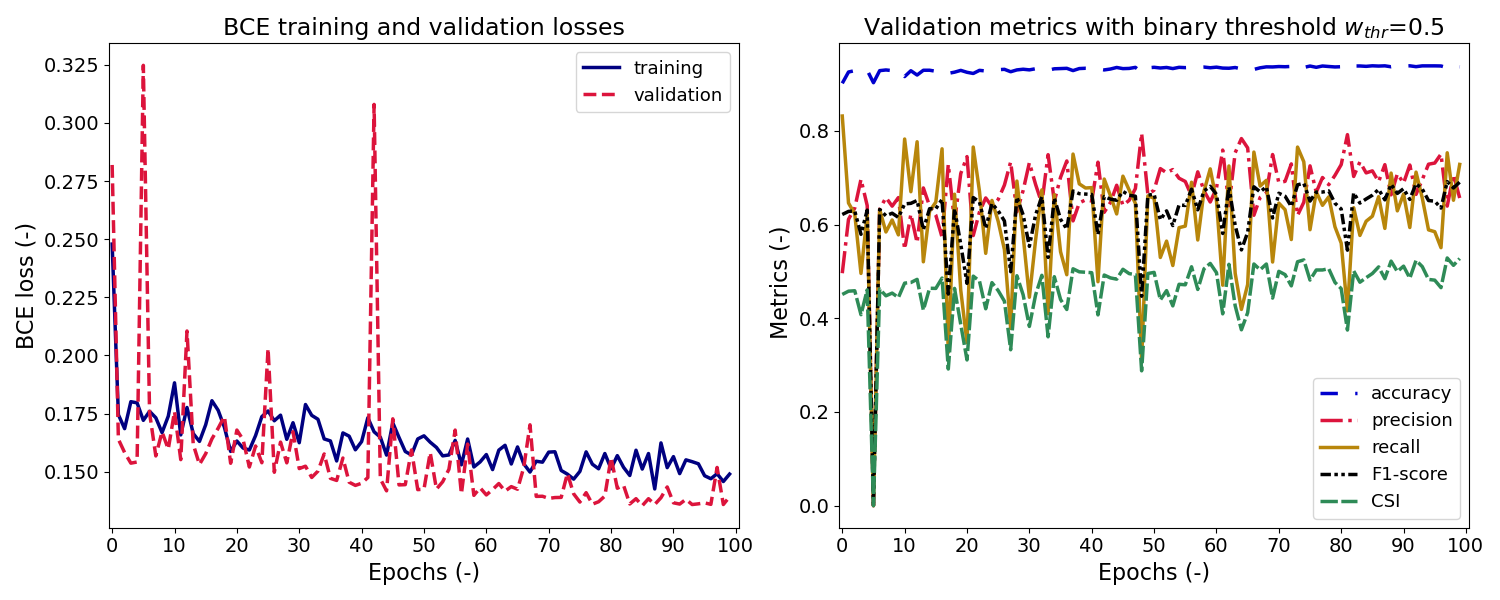

In [19]:
plot_losses_metrics(train_losses, val_losses, metrics, model_recall, loss_f=loss_f)

In [20]:
total_losses_metrics_dataset(model_loss, test_set, device=device)

OutOfMemoryError: CUDA out of memory. Tried to allocate 246.00 MiB. GPU 0 has a total capacity of 4.00 GiB of which 0 bytes is free. Of the allocated memory 10.51 GiB is allocated by PyTorch, and 363.67 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [20]:
total_losses_metrics_dataset(model_recall, test_set, model_type='max recall', device=device)

Average metrics for test dataset using max recall model:

BCE loss:          1.552e-01
Accuracy:          0.930
Precision:         0.670
Recall:            0.777
F1 score:          0.718
CSI score:         0.561


In [21]:
# check metrics with optimal threshold according to ROC and PR curves

new_thr = 0.402
total_losses_metrics_dataset(model_loss, test_set, water_threshold=new_thr, device=device)
total_losses_metrics_dataset(model_recall, test_set, water_threshold=new_thr, model_type='max recall', device=device)

Average metrics for test dataset using min loss model:

BCE loss:          1.423e-01
Accuracy:          0.932
Precision:         0.677
Recall:            0.790
F1 score:          0.727
CSI score:         0.573
Average metrics for test dataset using max recall model:

BCE loss:          1.552e-01
Accuracy:          0.925
Precision:         0.632
Recall:            0.833
F1 score:          0.717
CSI score:         0.559


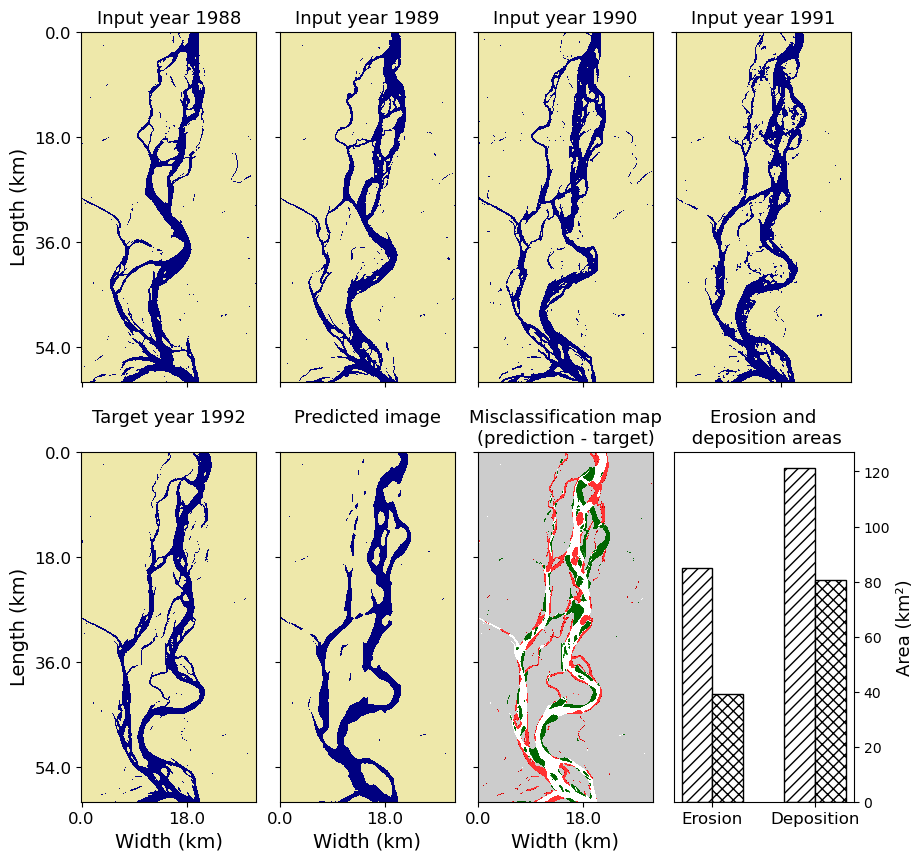

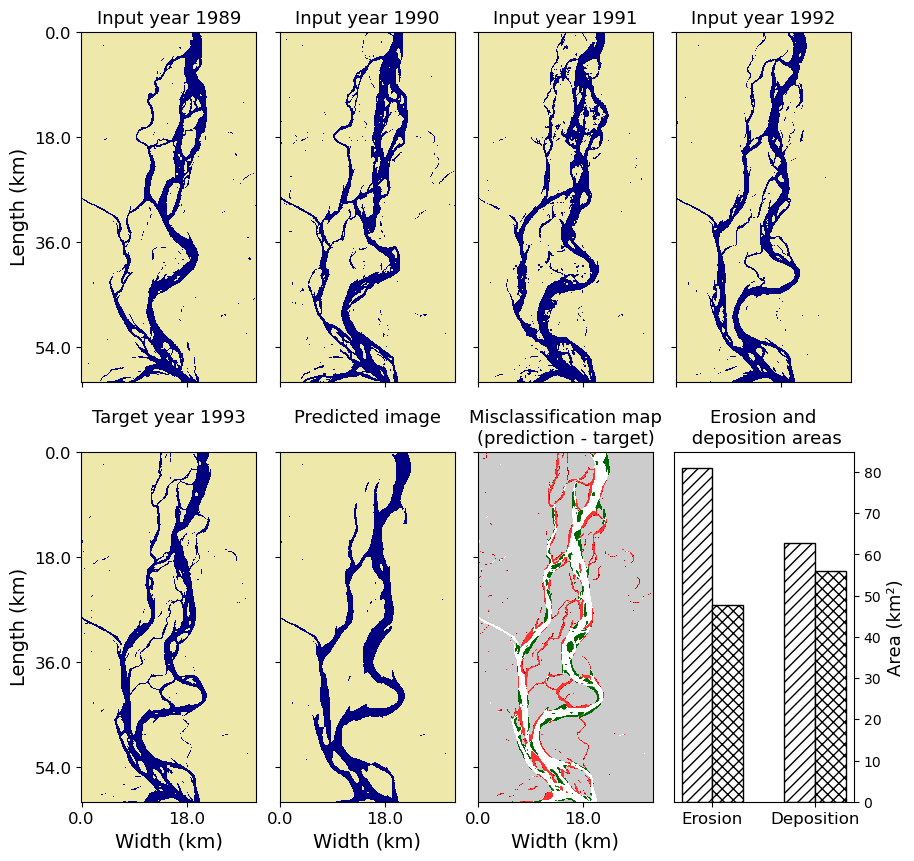

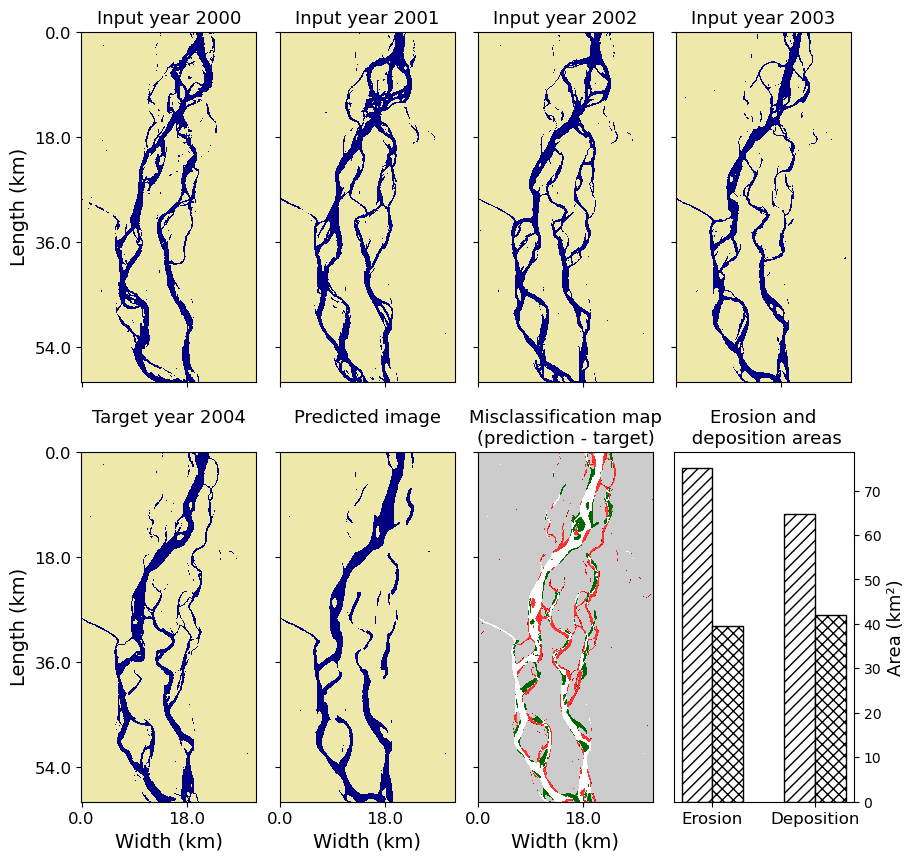

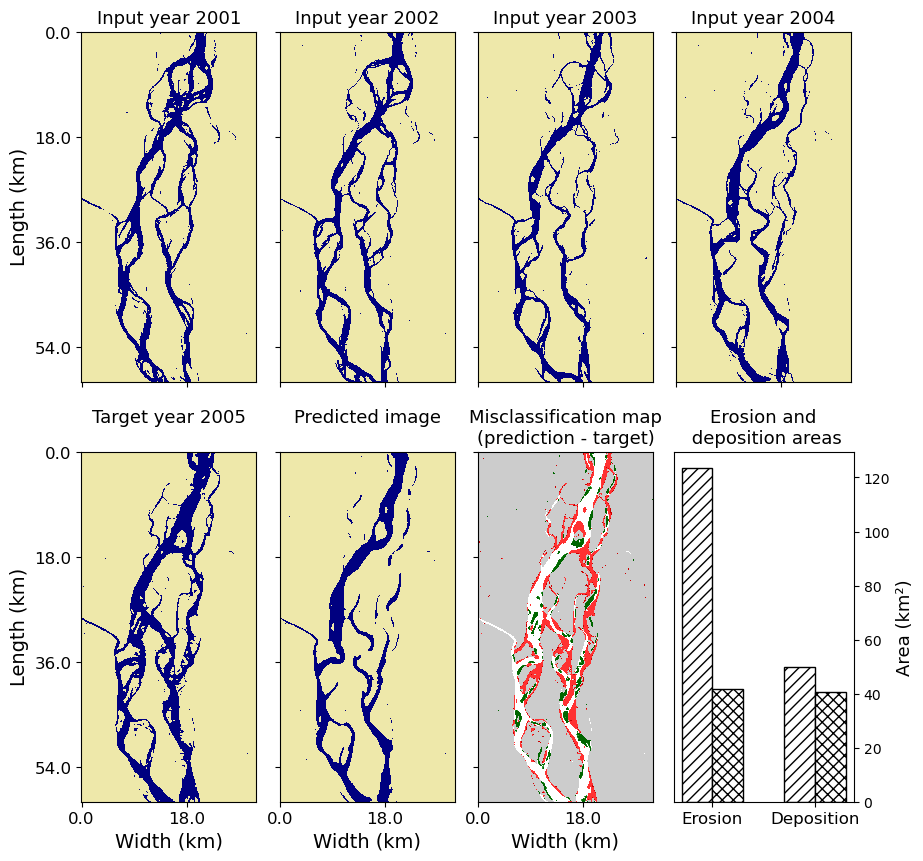

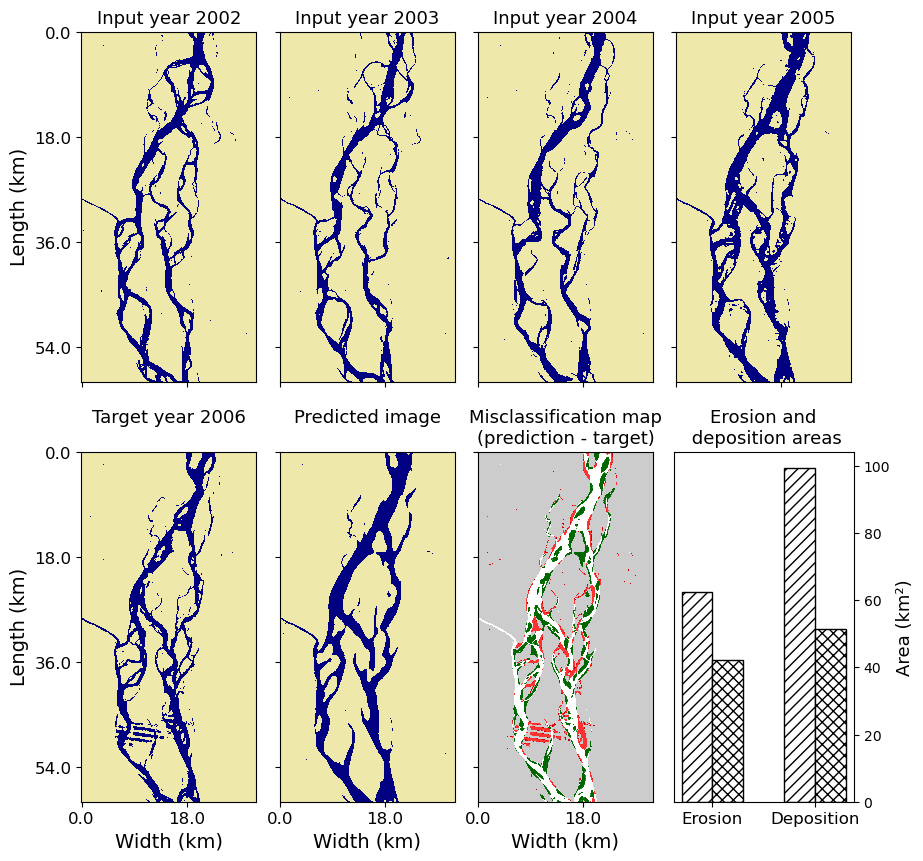

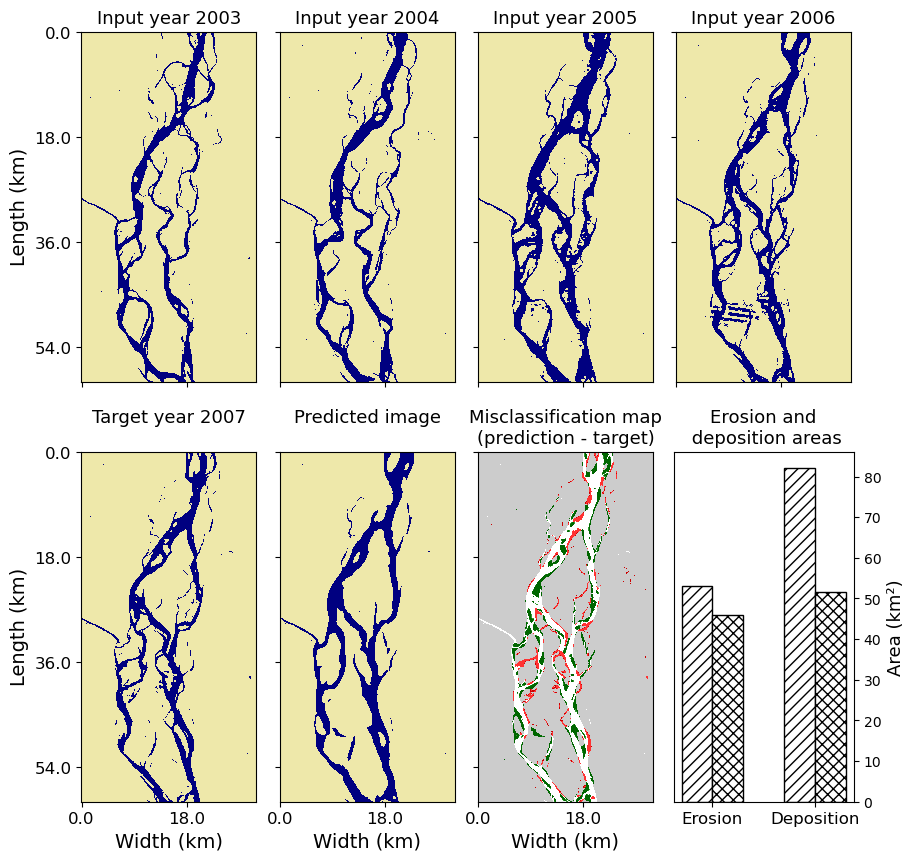

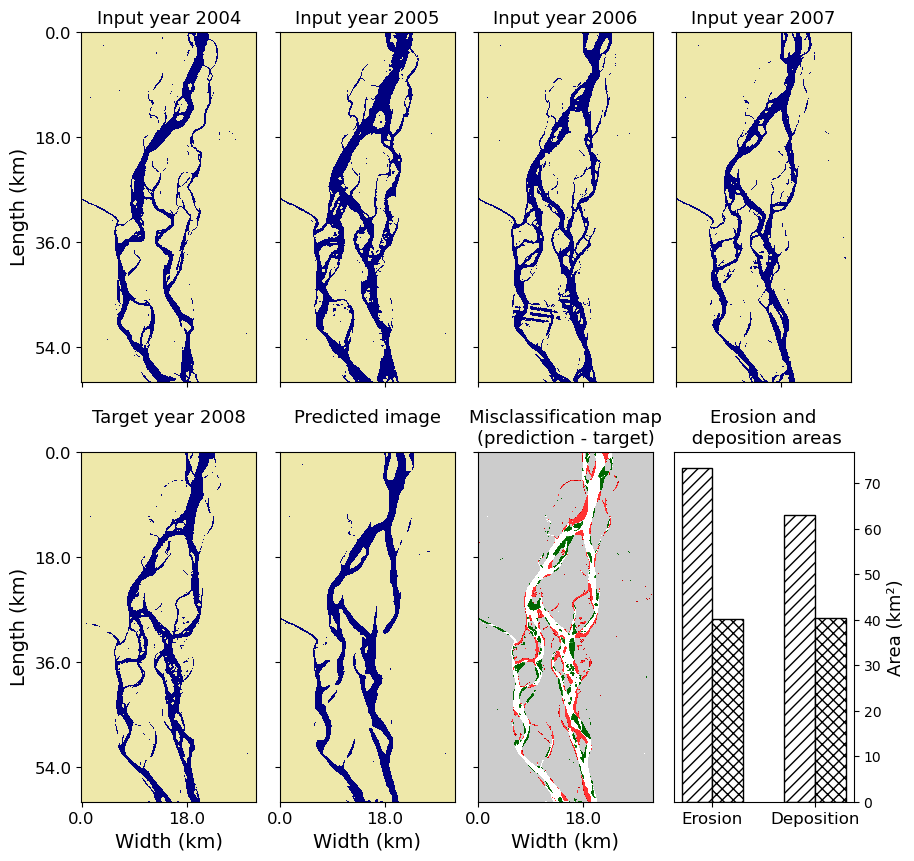

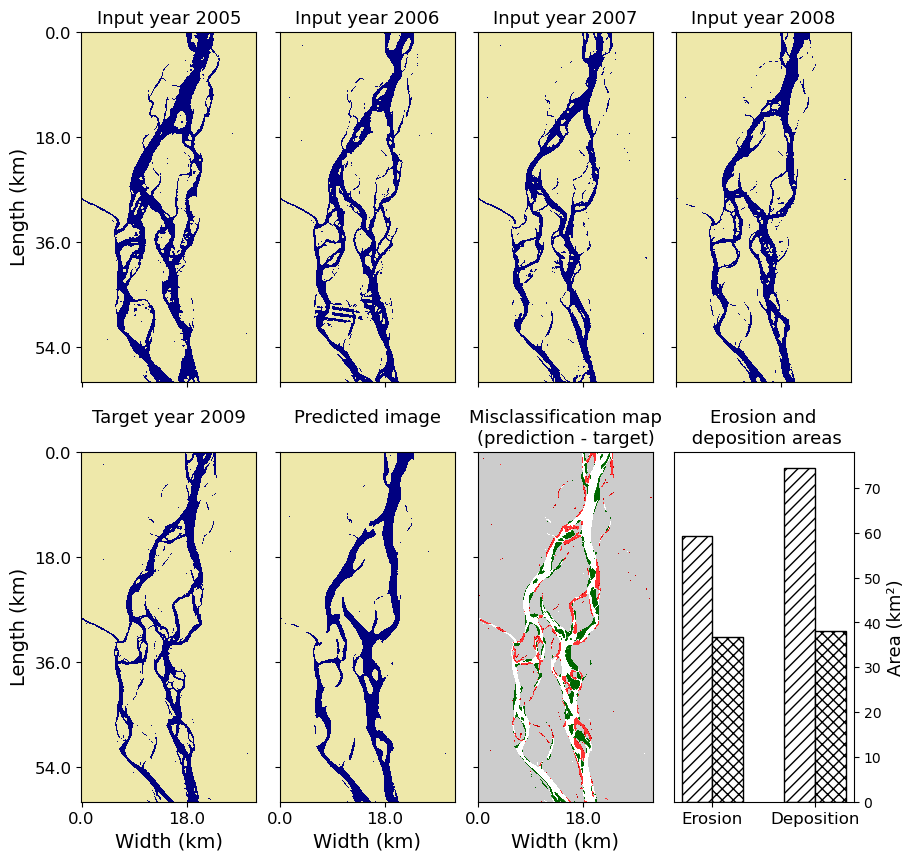

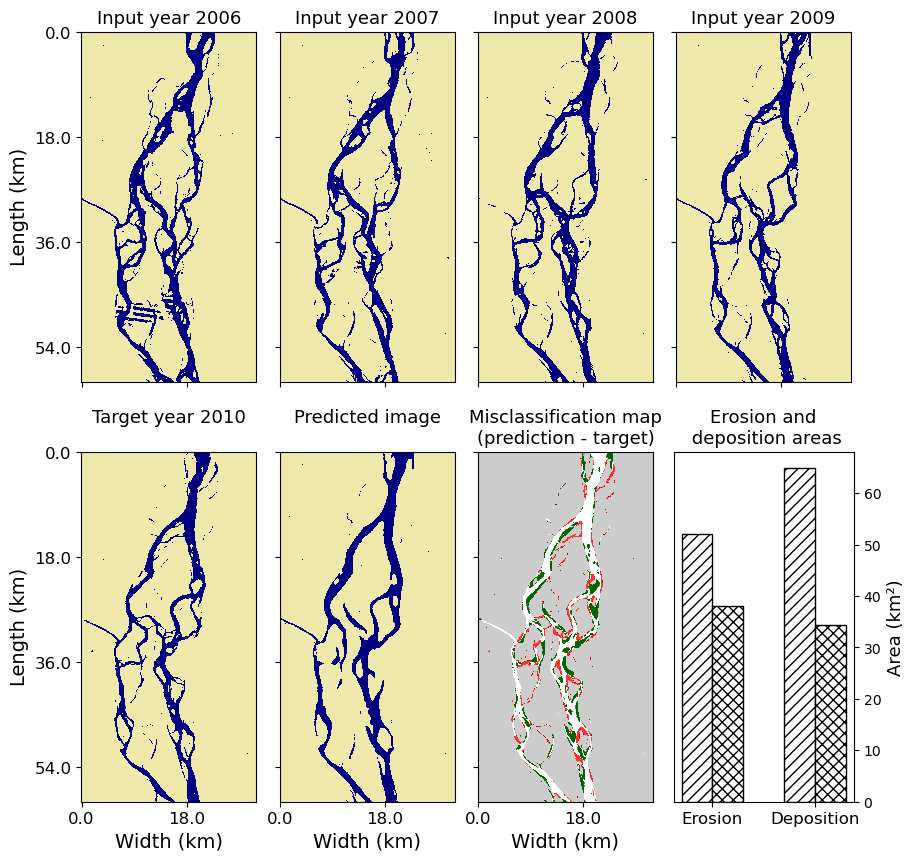

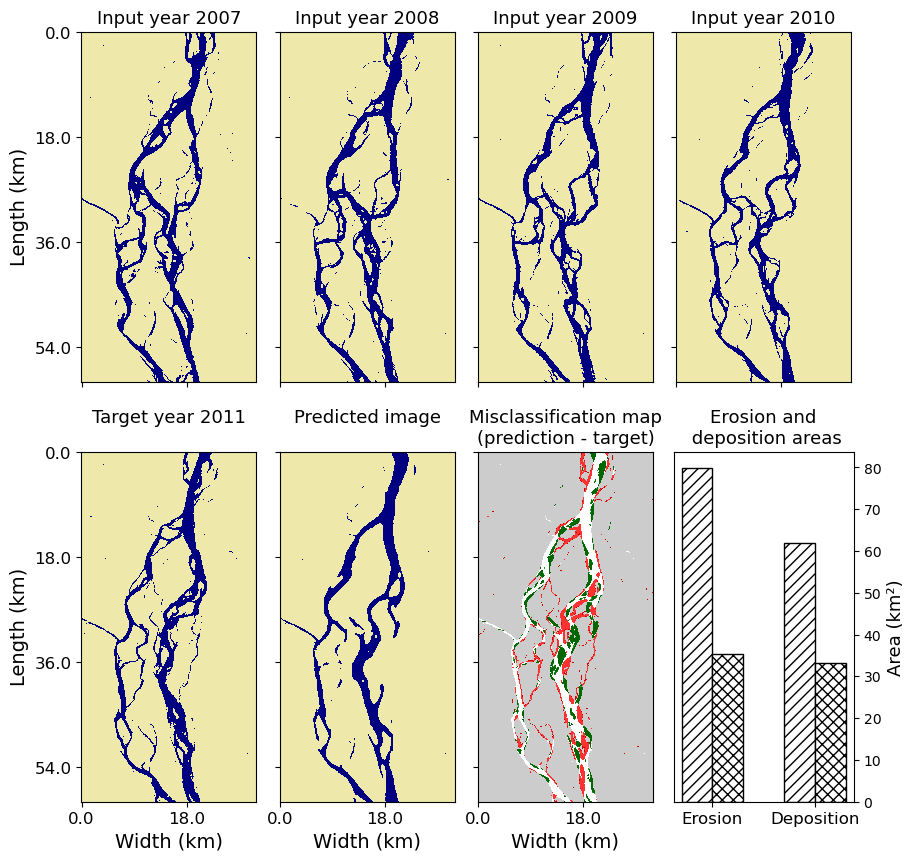

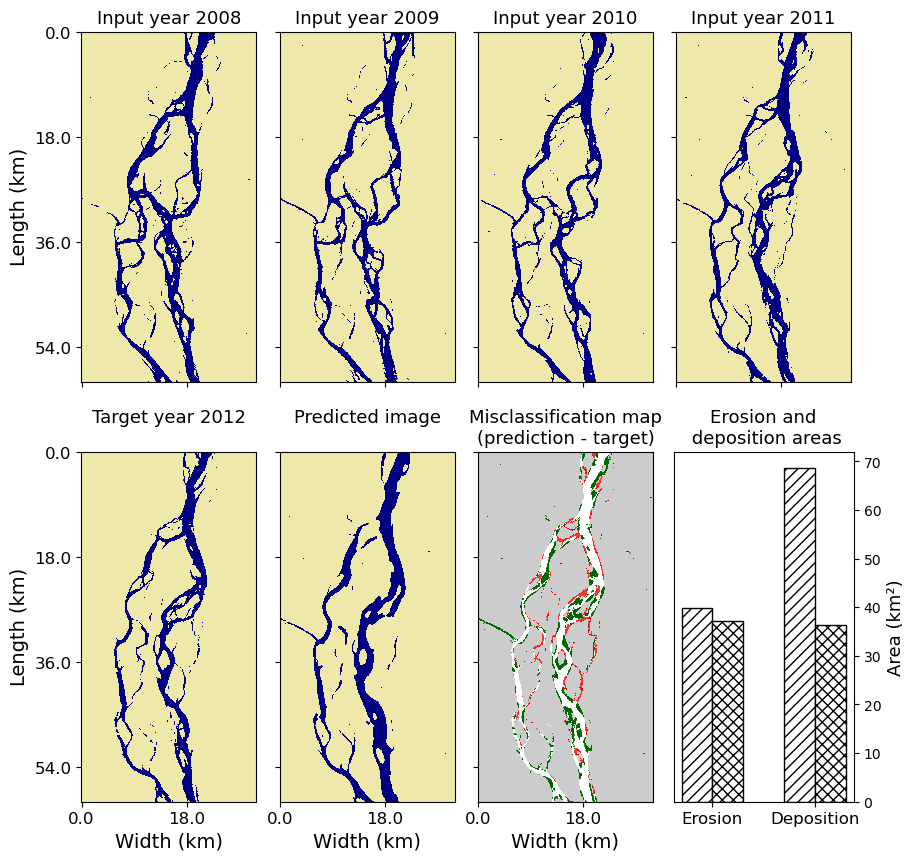

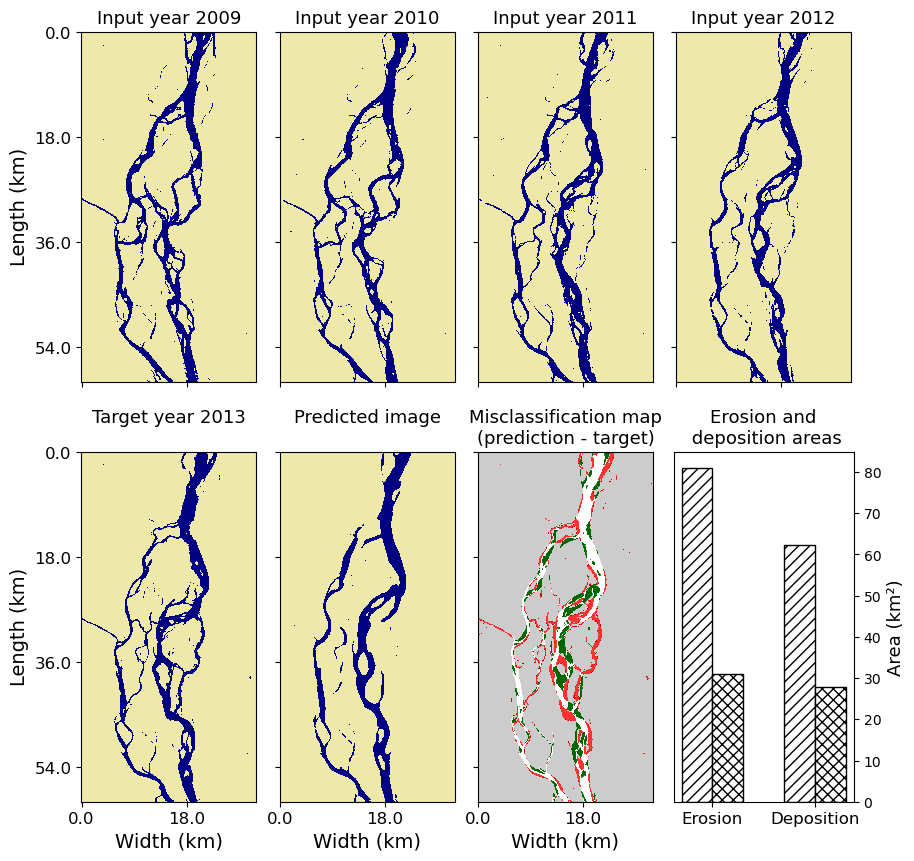

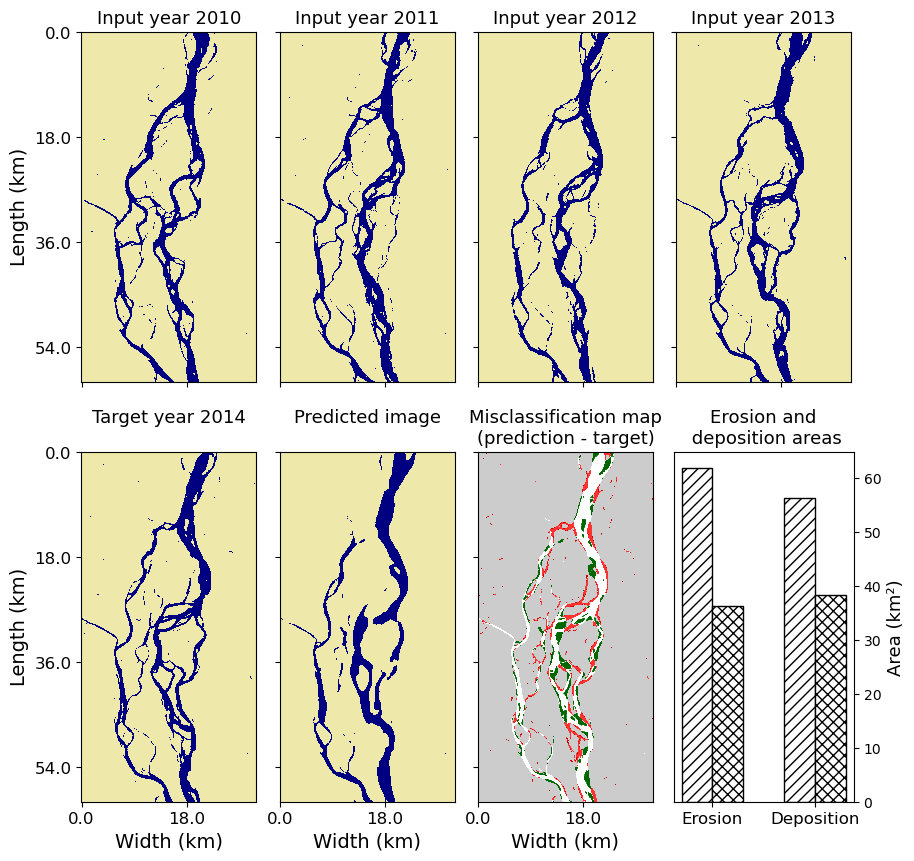

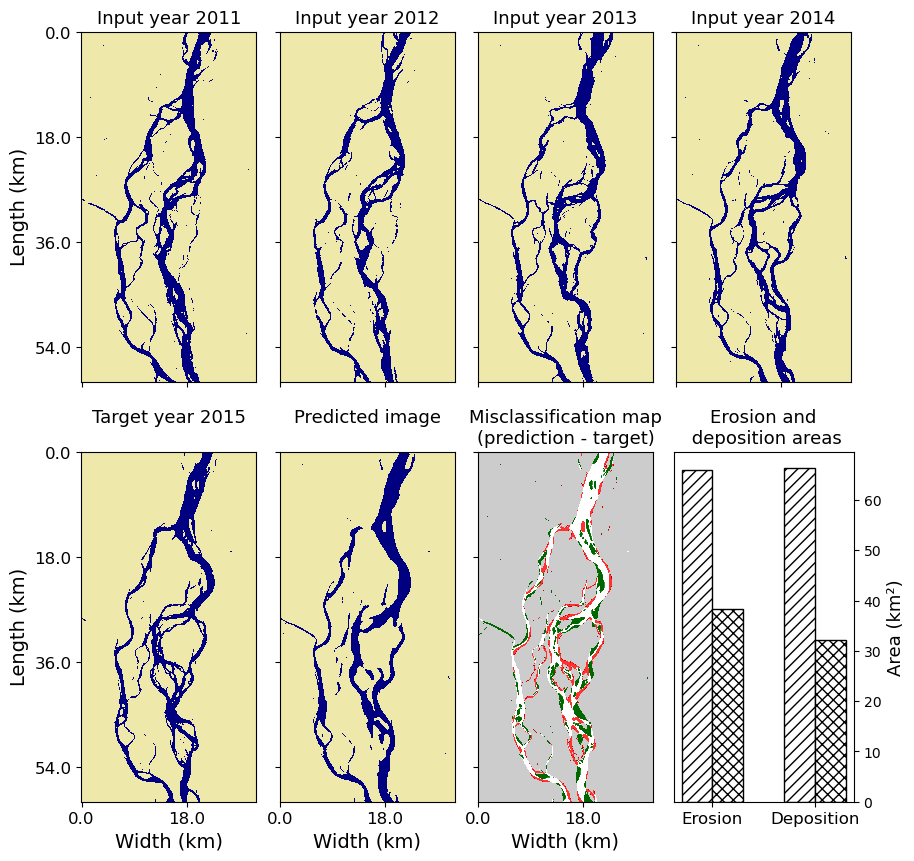

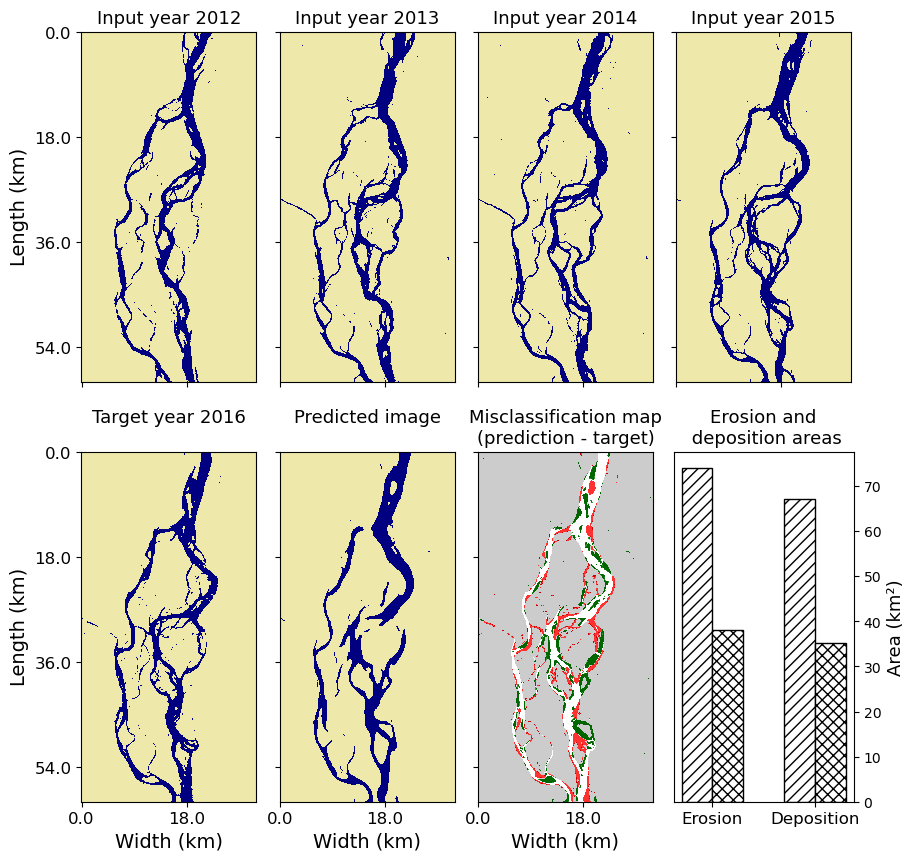

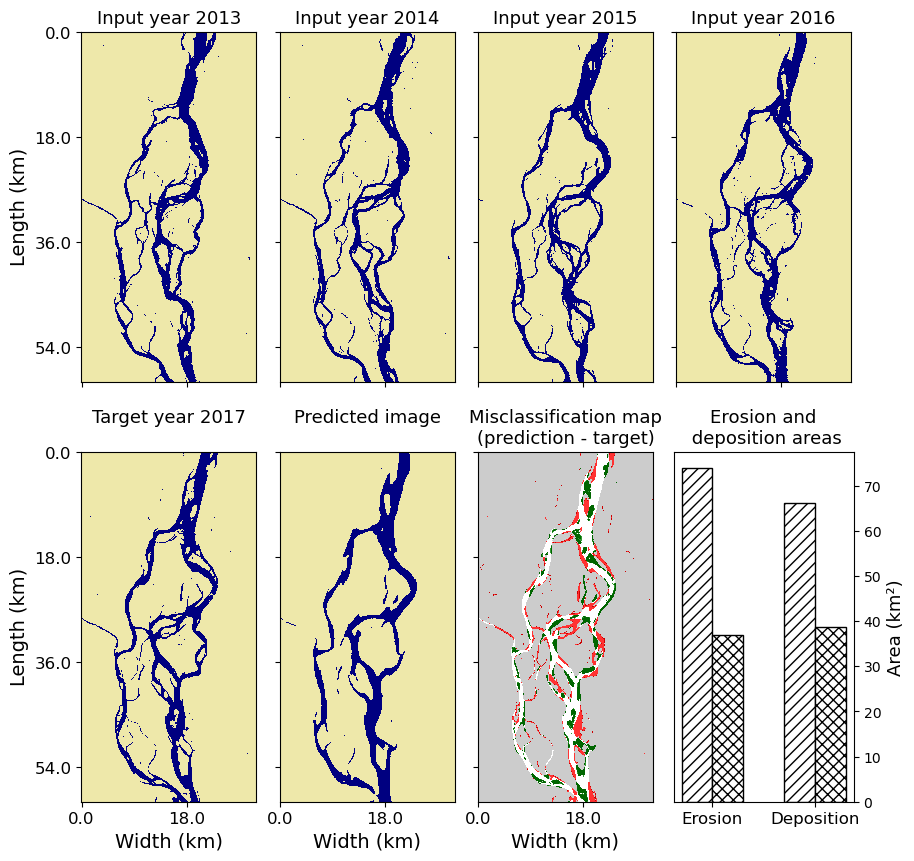

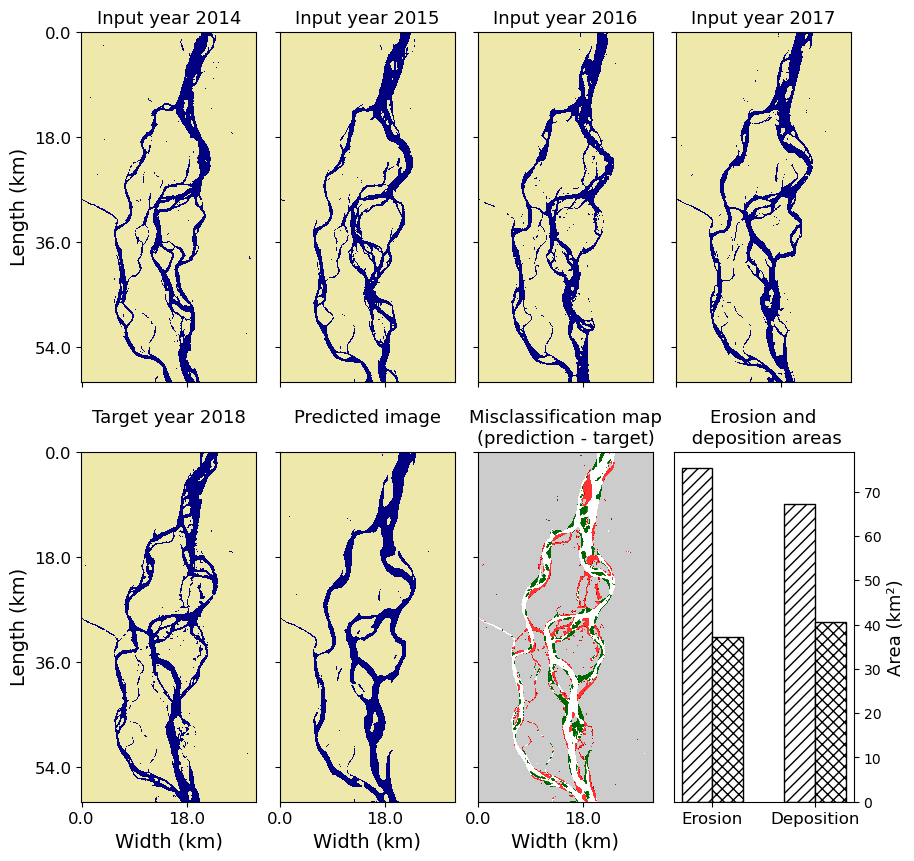

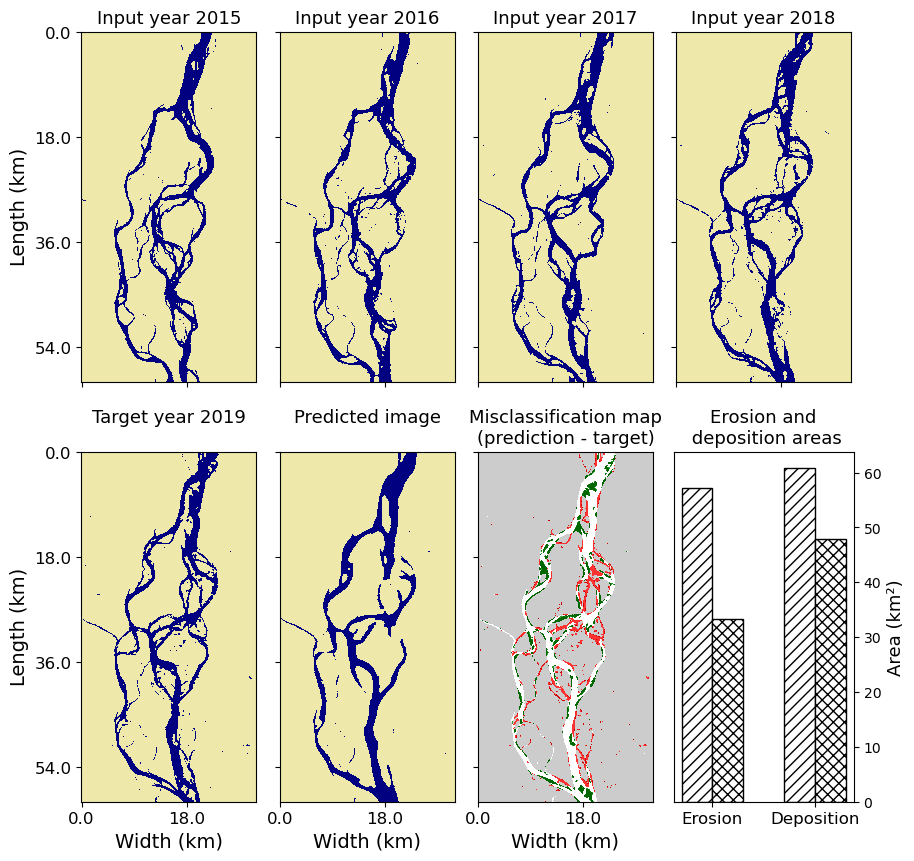

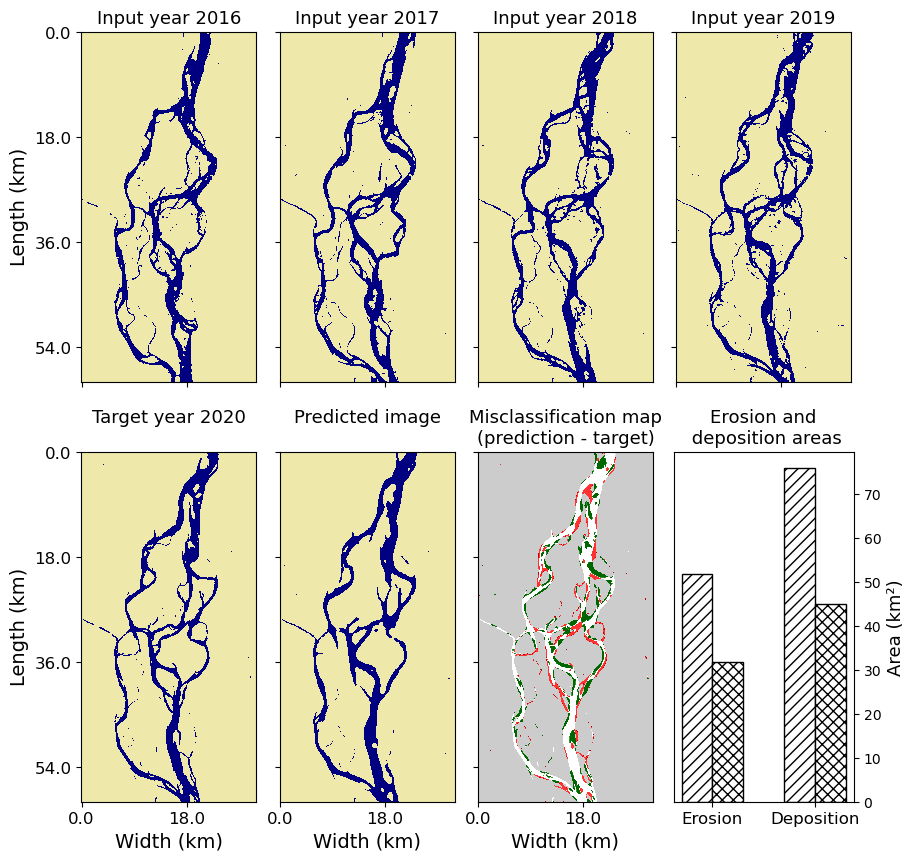

In [23]:
%matplotlib inline
for i in range(len(test_set)):
    show_evolution_nolegend(i, test_set, model_loss, device=device, save_img=False)

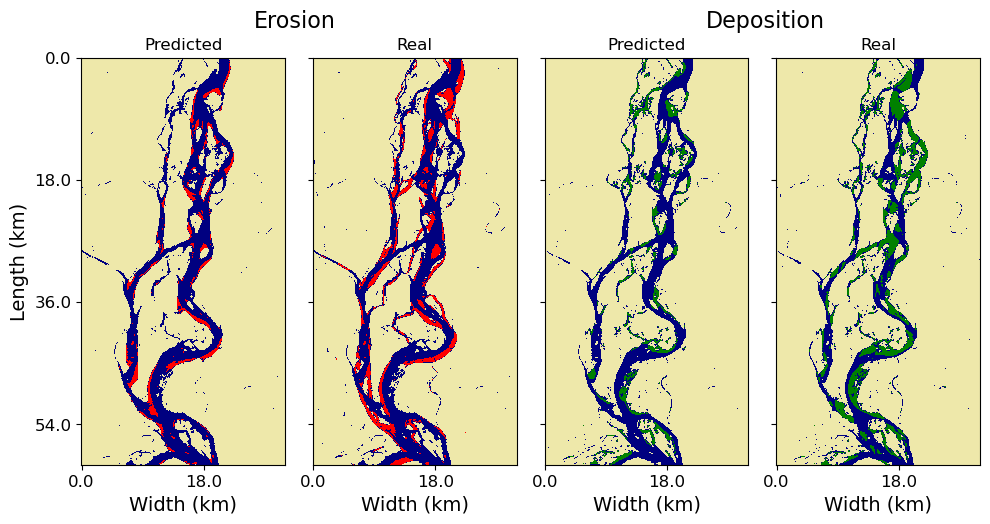

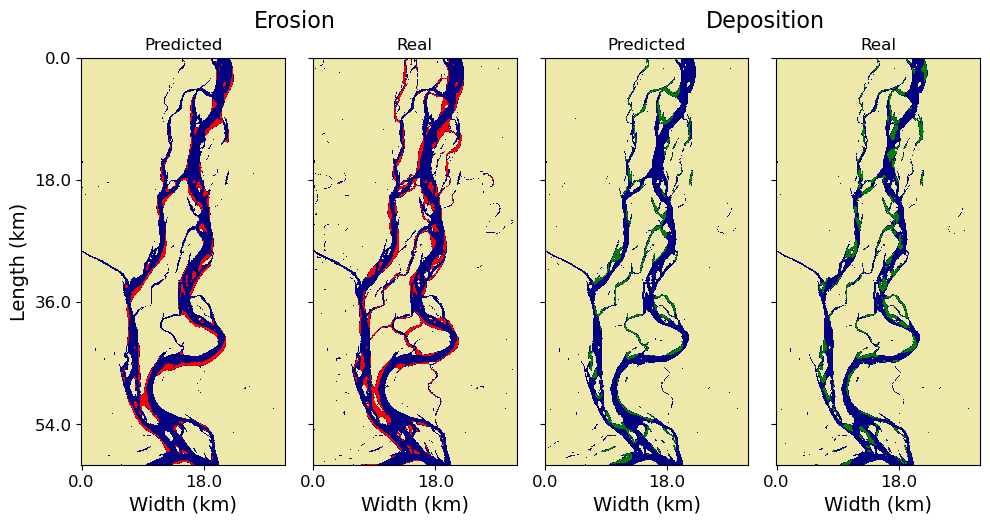

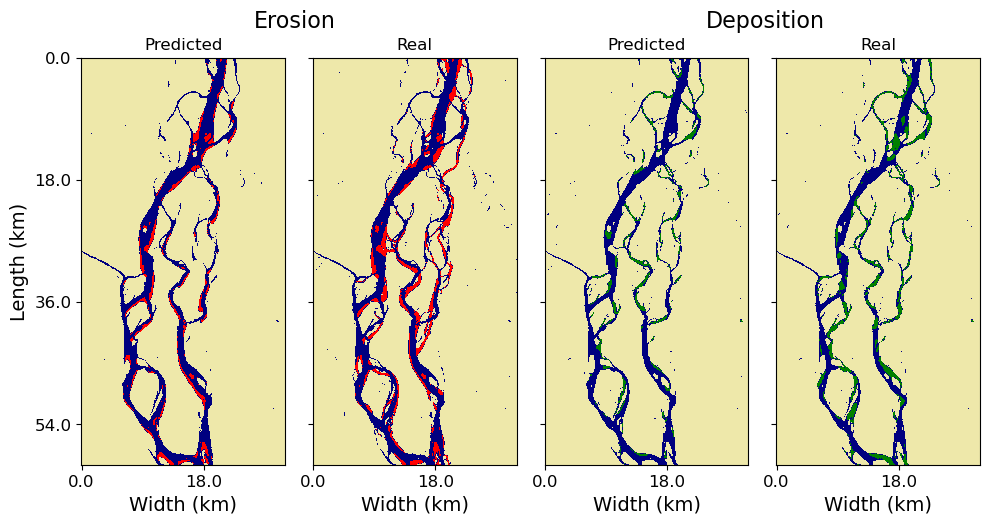

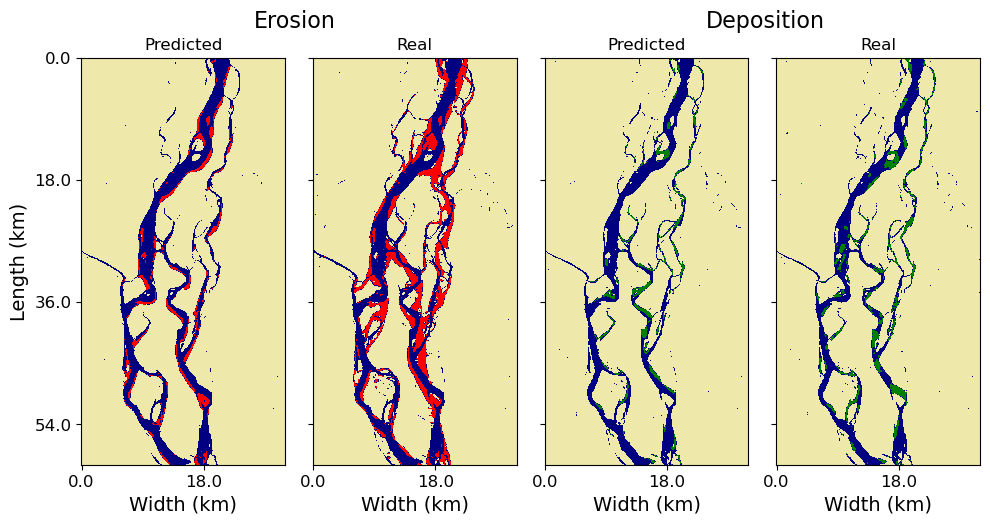

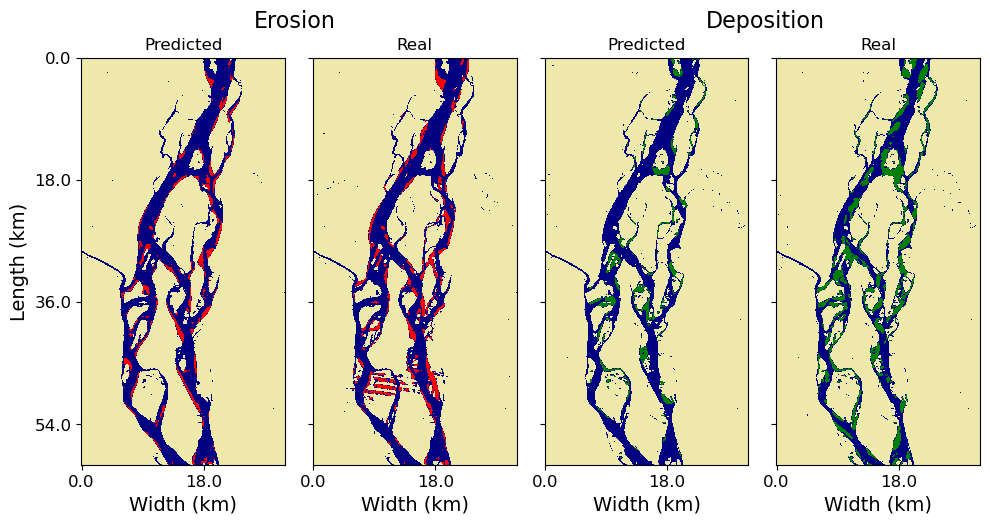

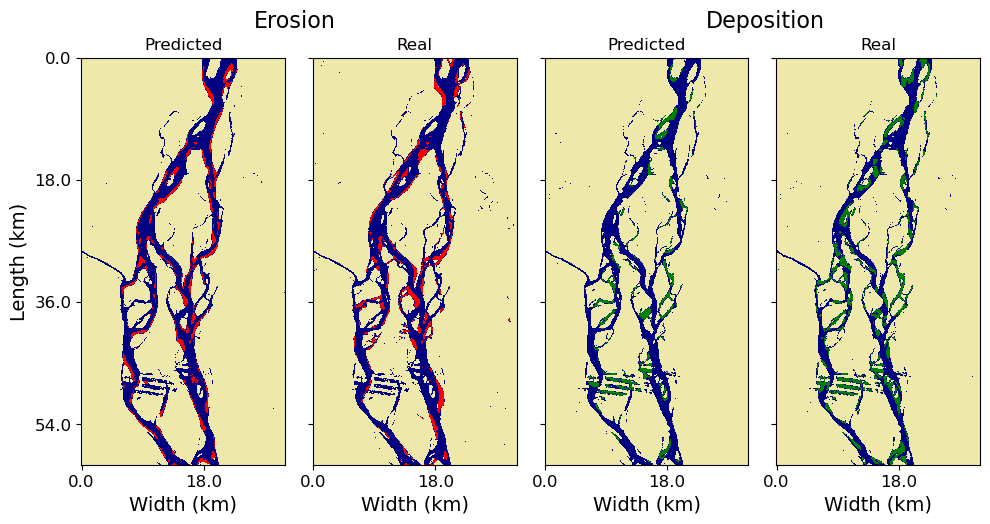

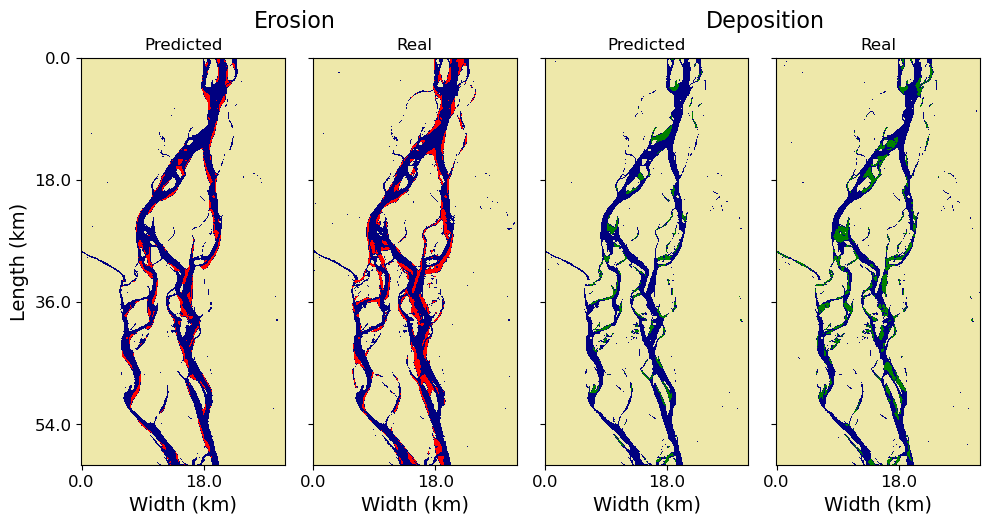

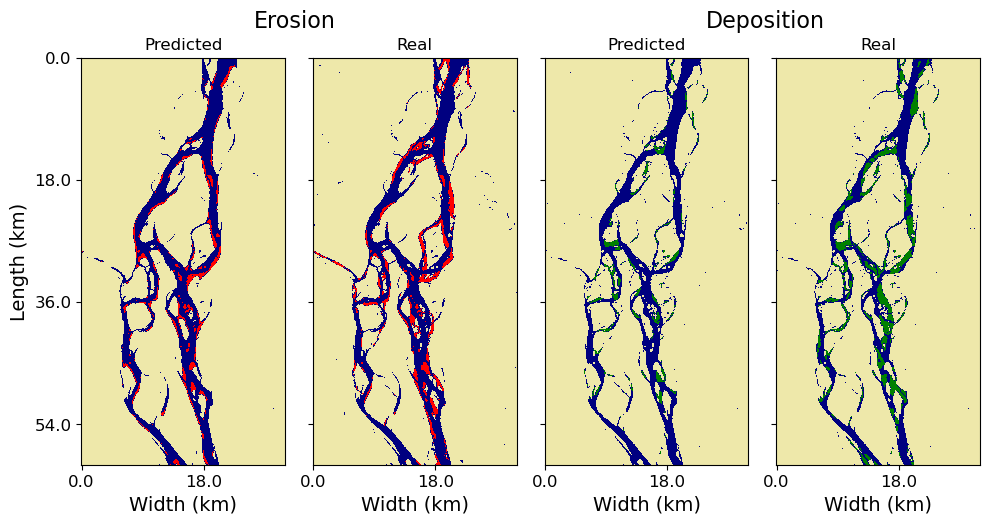

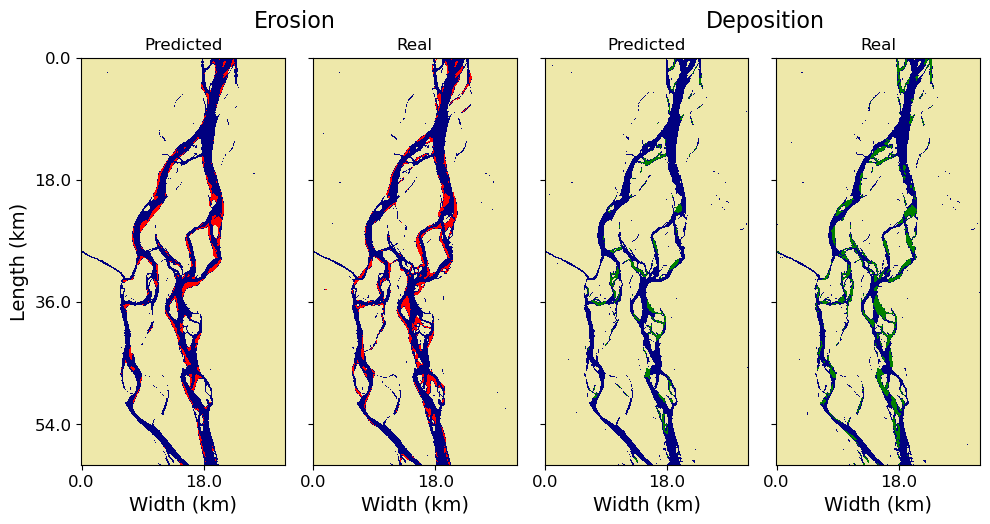

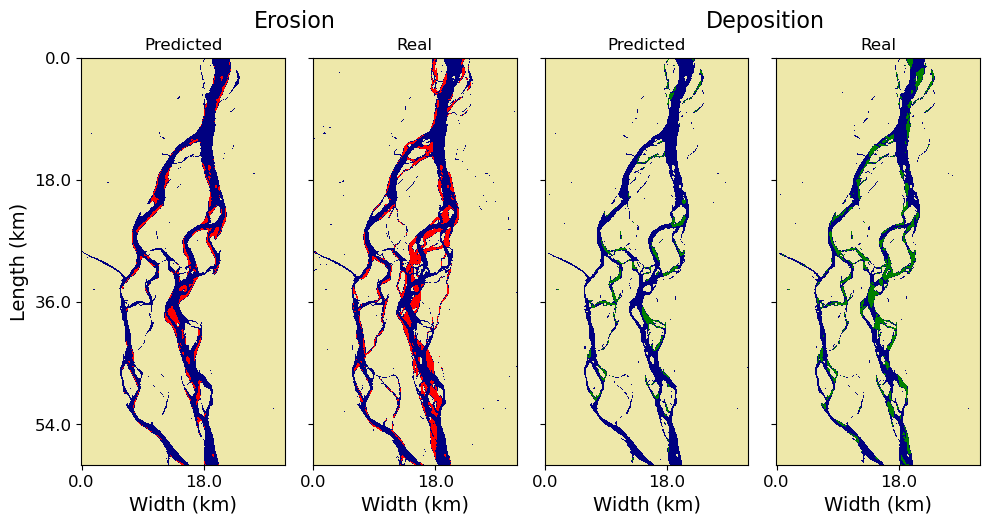

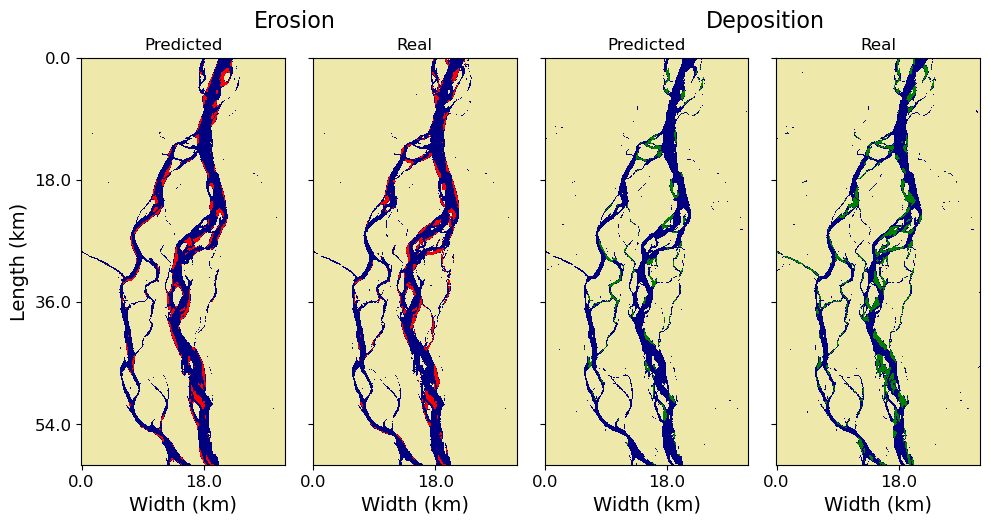

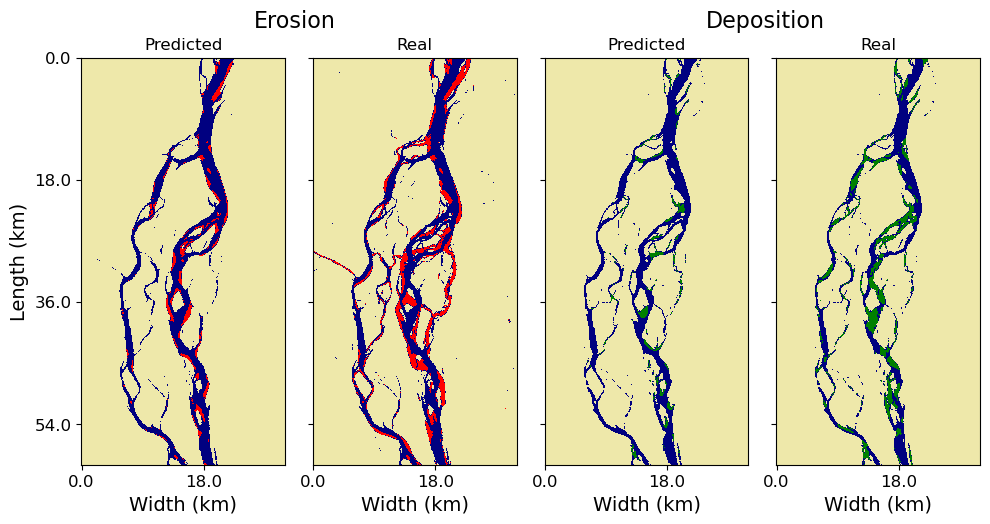

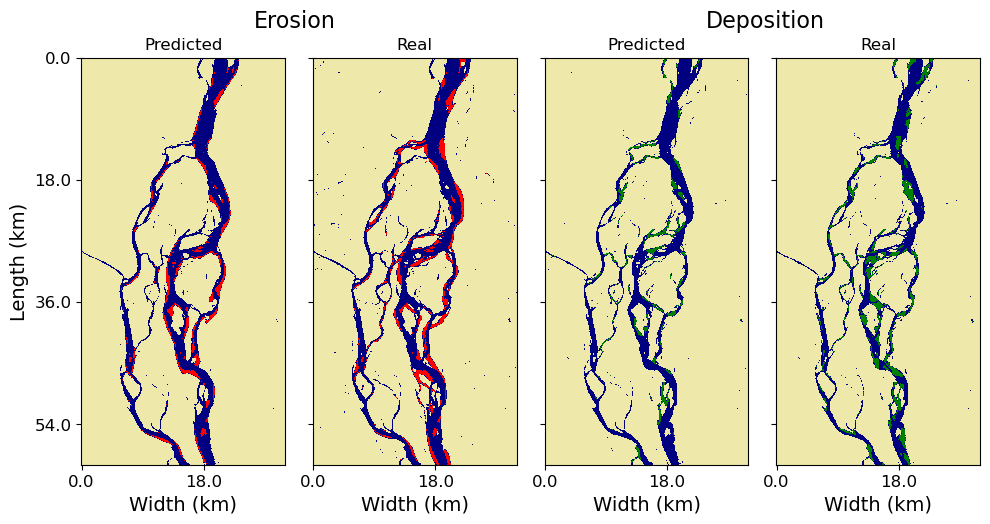

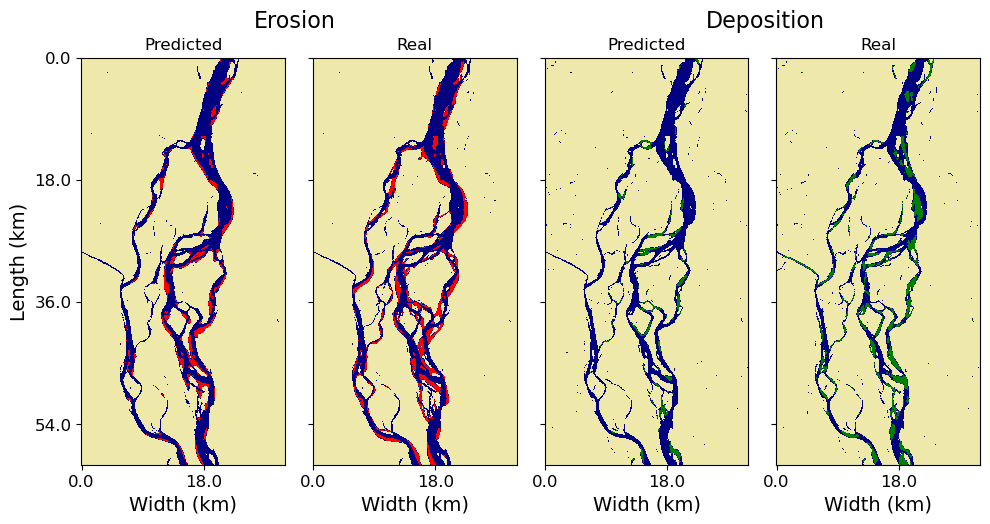

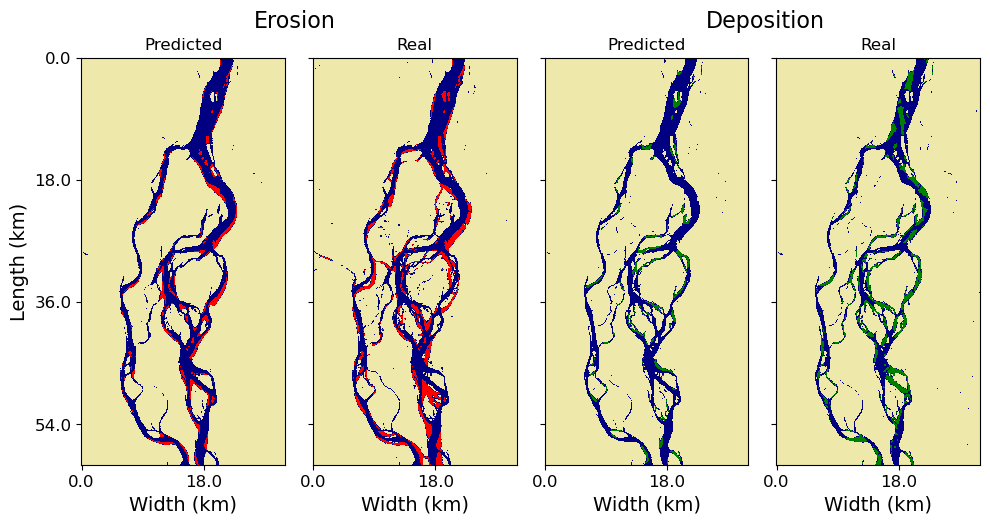

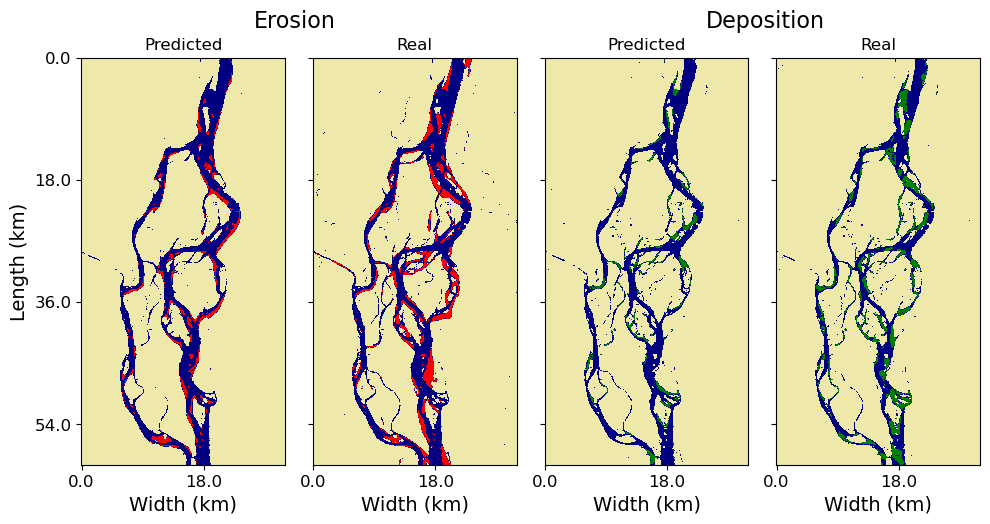

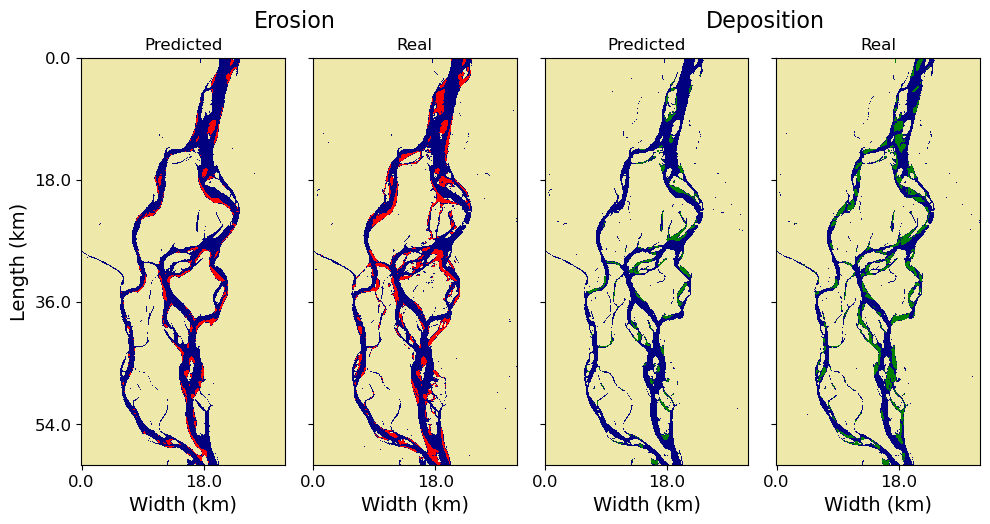

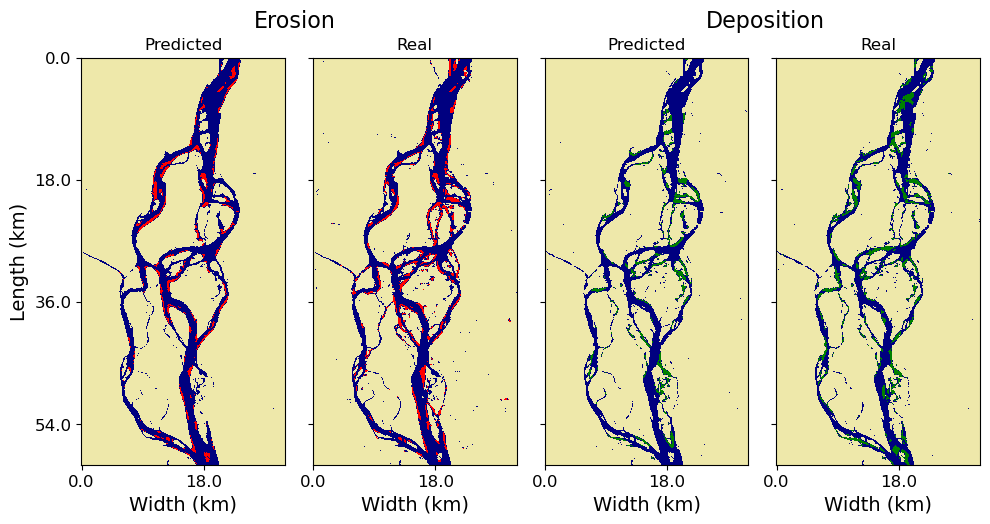

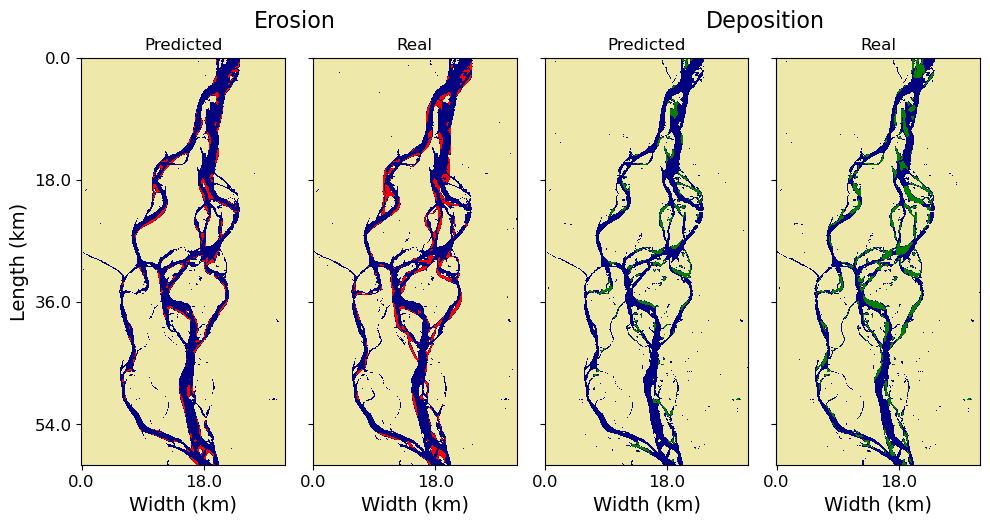

In [22]:
%matplotlib inline
for i in range(len(test_set)):
    erosion_sites(model_loss, test_set, i, device=device, save_img=False)

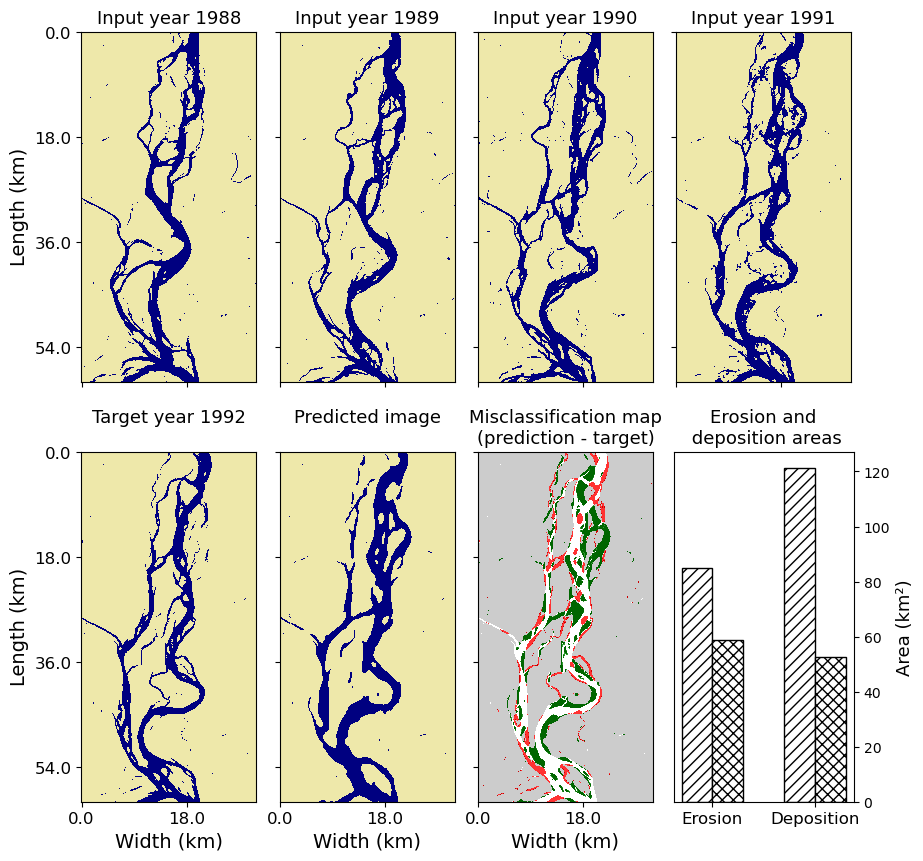

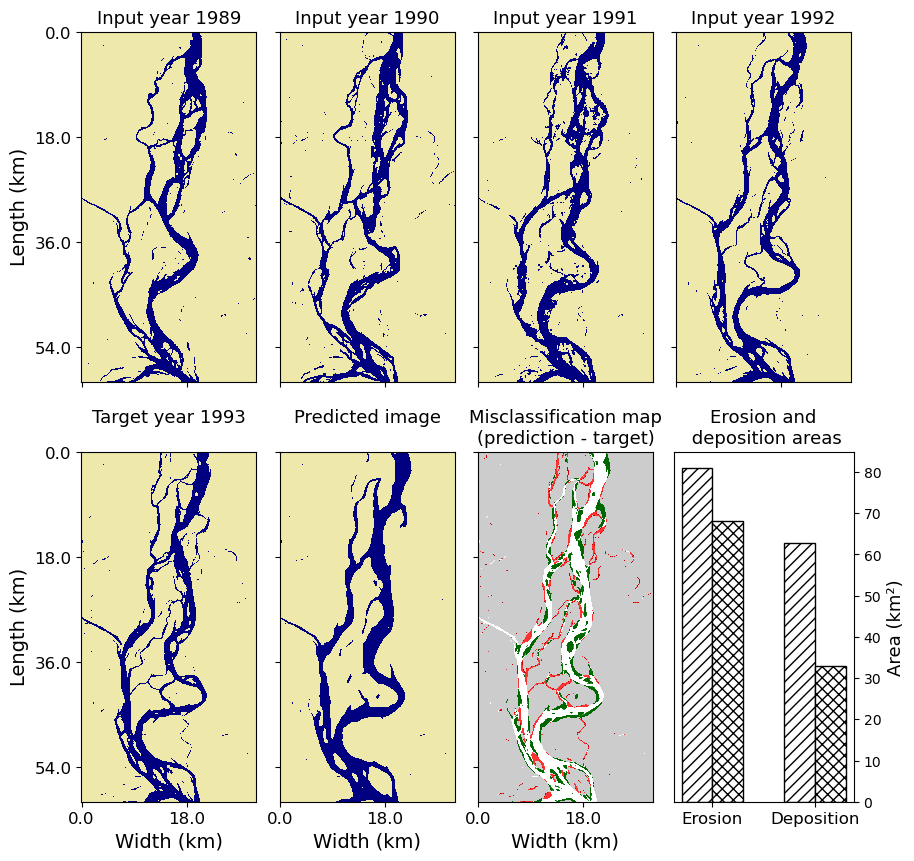

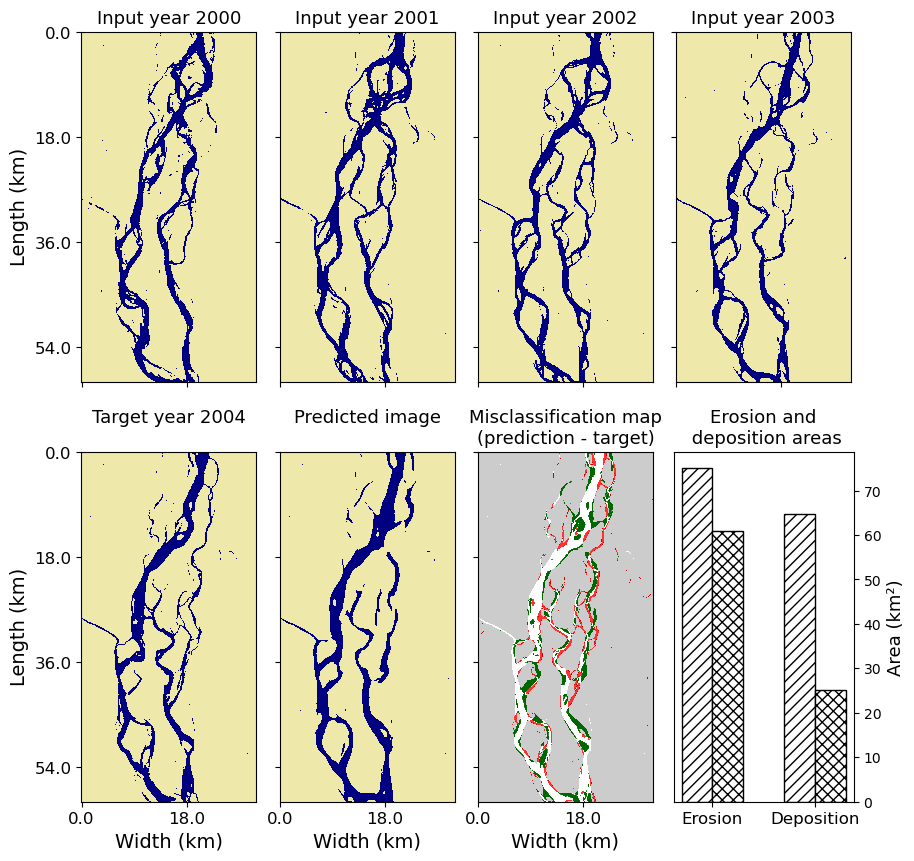

In [25]:
# visualise min loss model predictions with optimal threshold

%matplotlib inline
for i in range(3):
    show_evolution_nolegend(i, test_set, model_loss, water_threshold=new_thr, loss_recall='min loss_0.4', device=device, save_img=False)

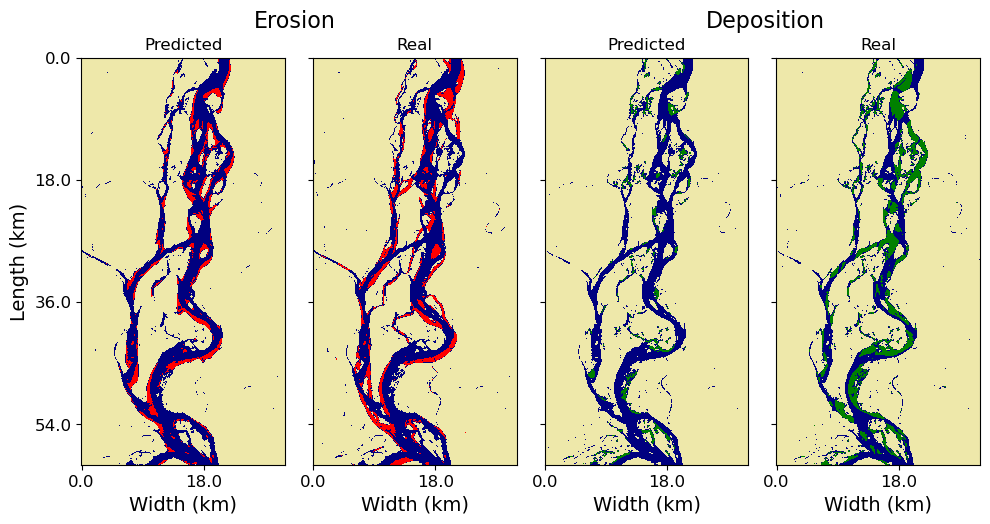

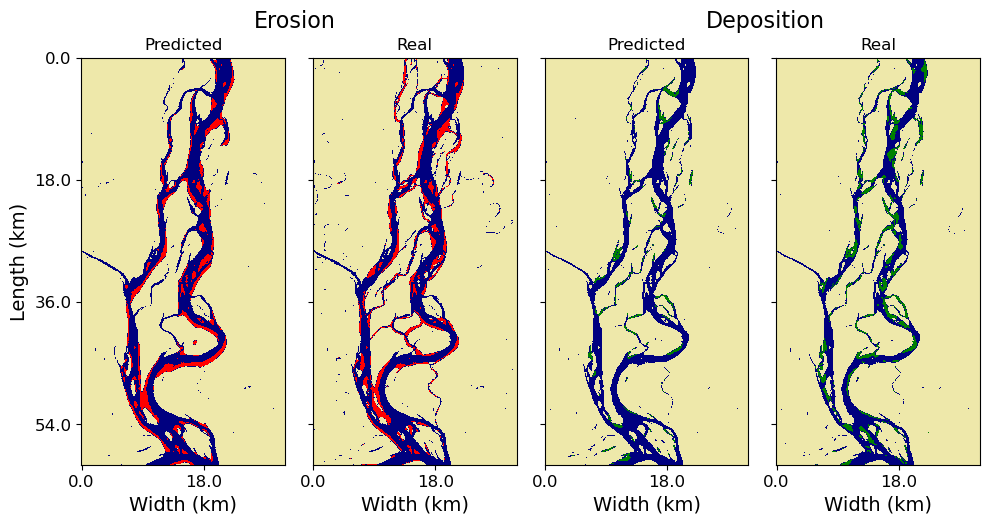

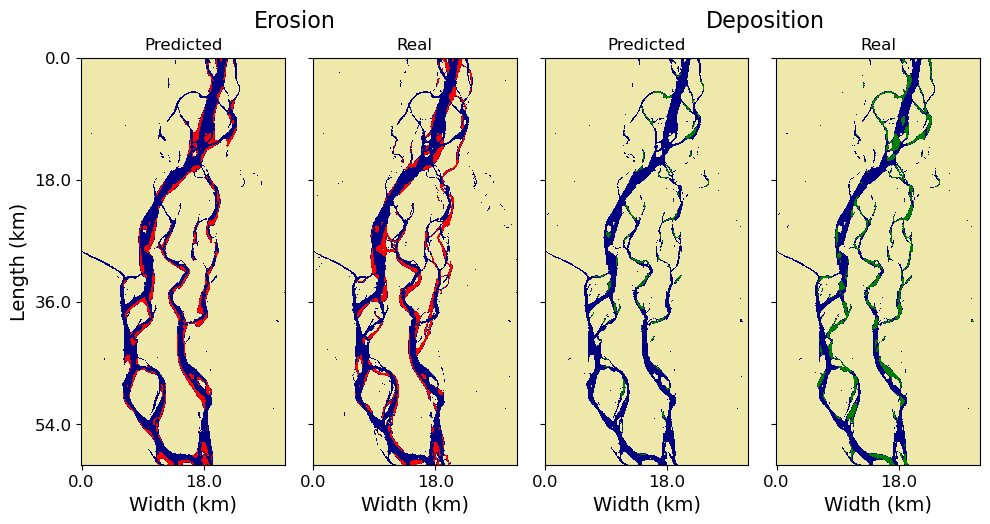

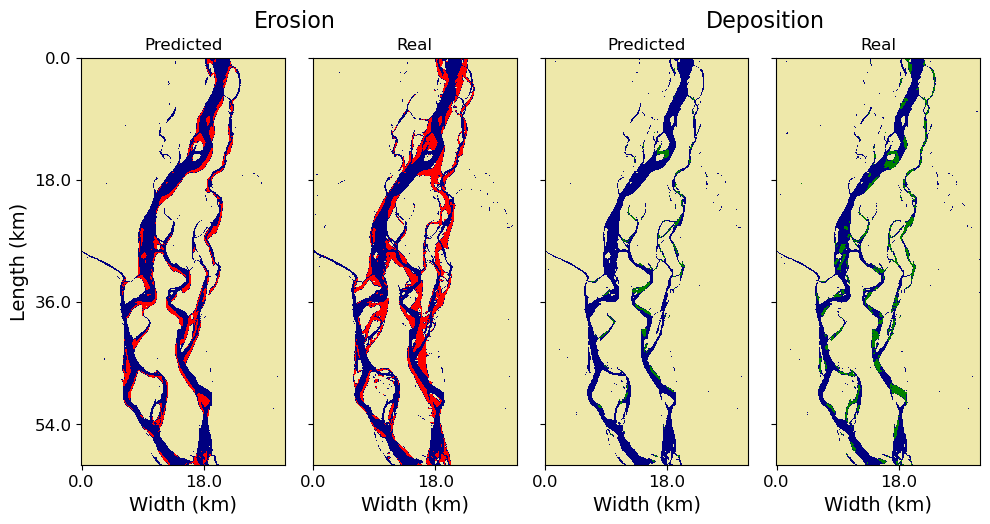

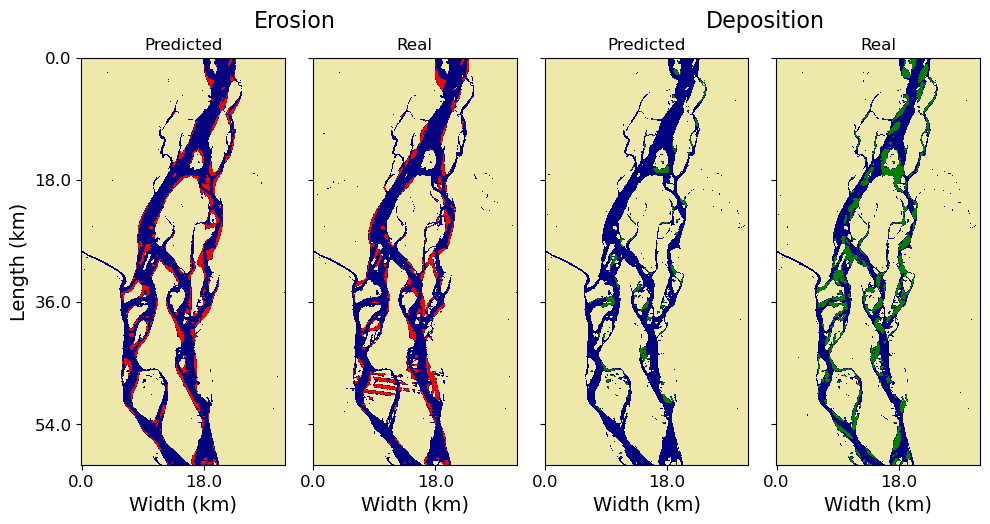

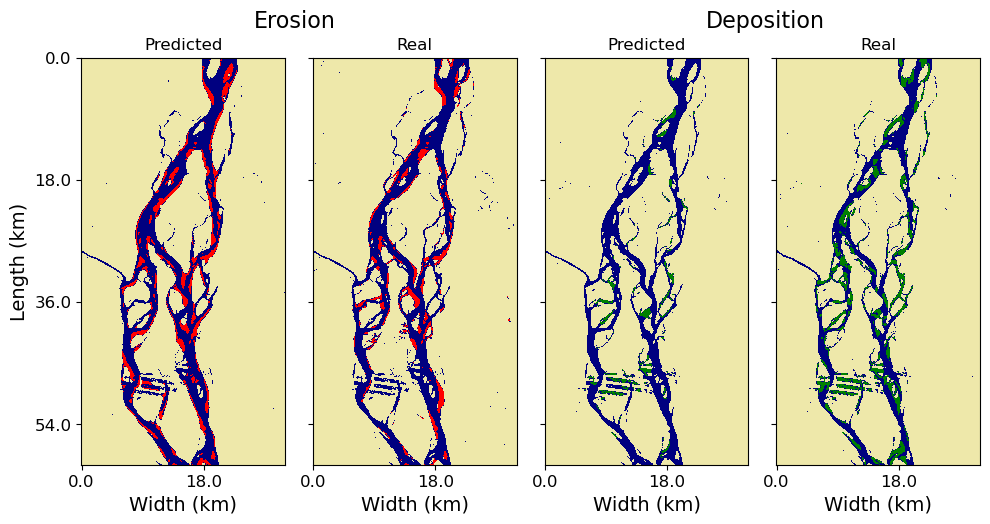

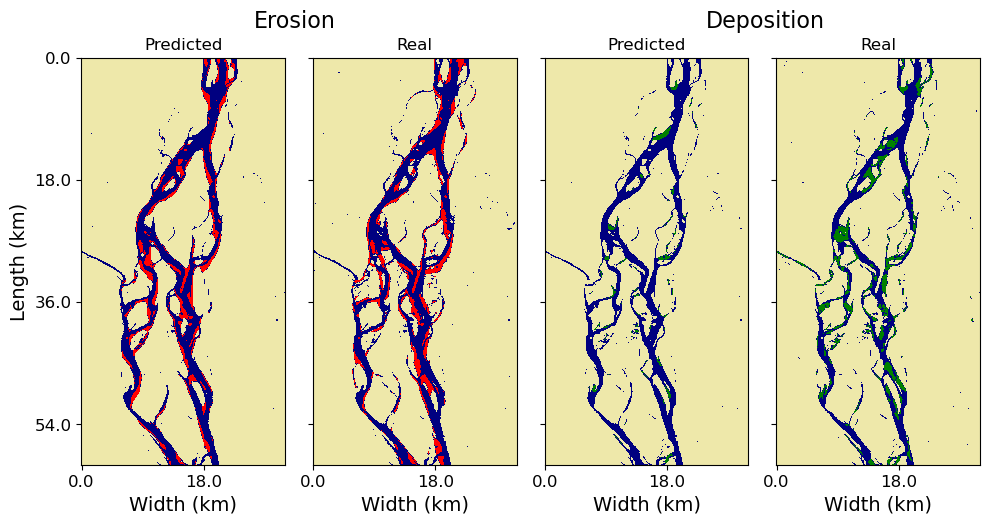

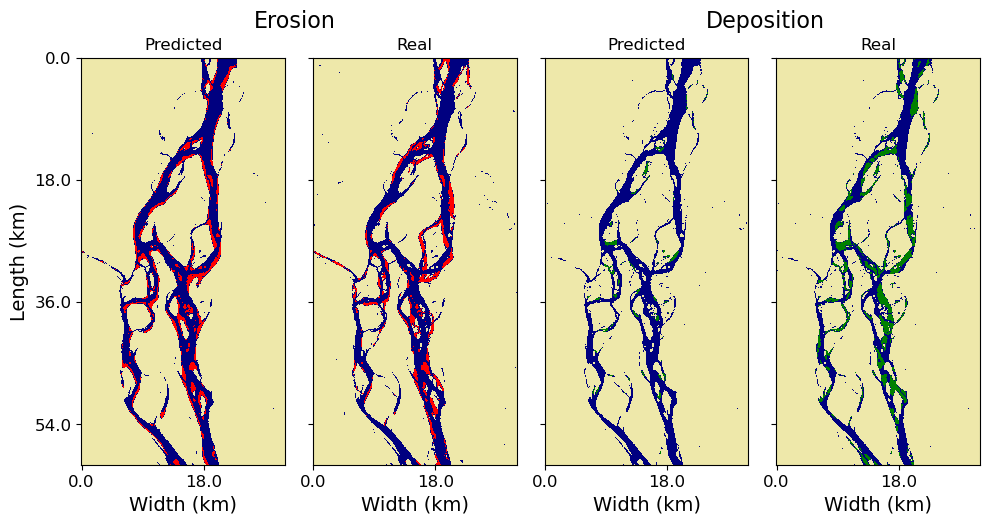

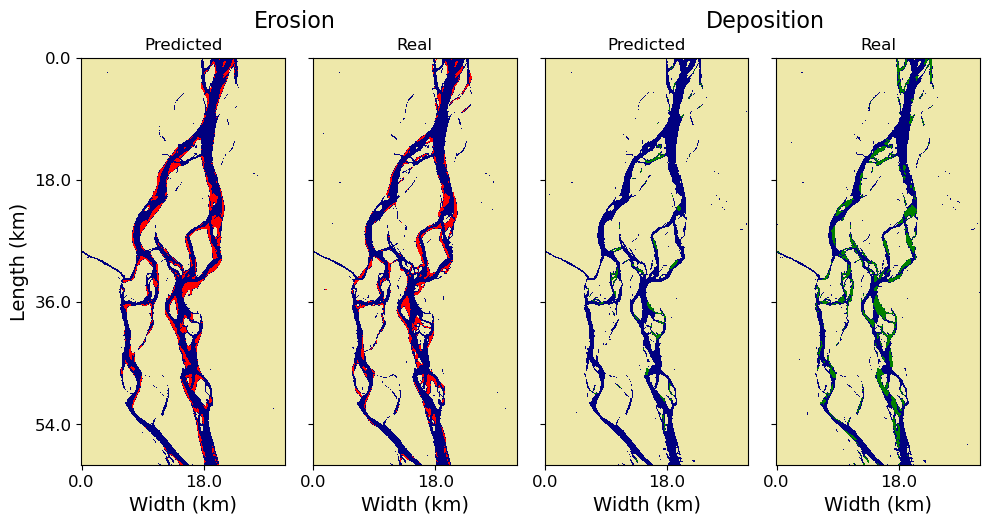

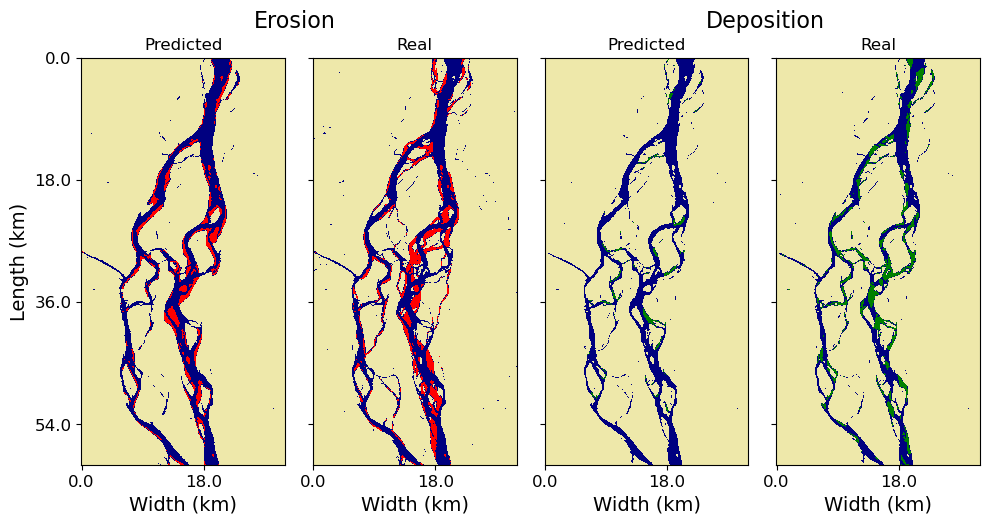

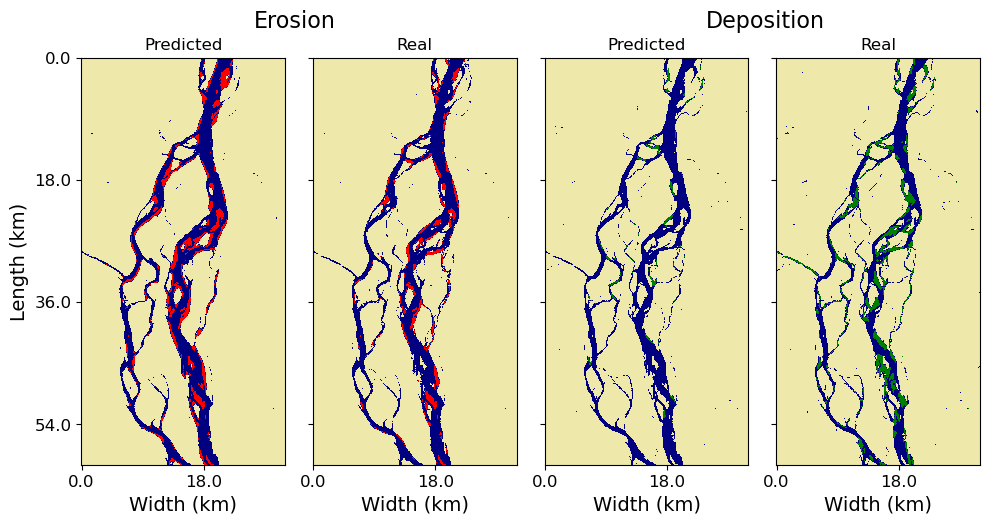

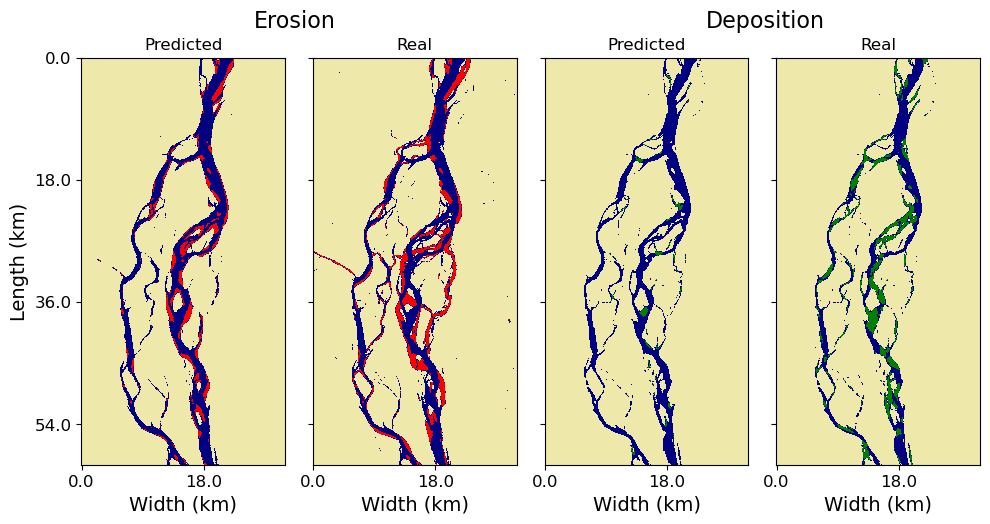

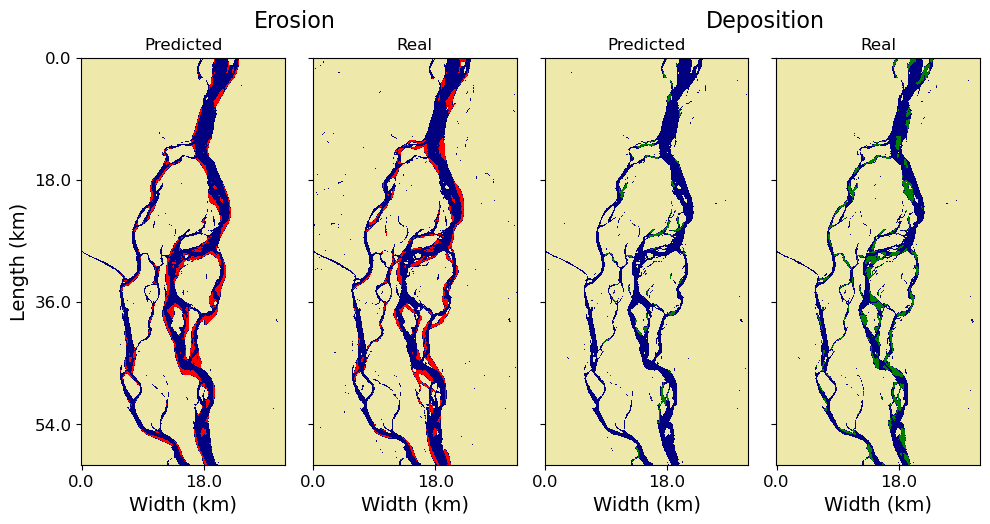

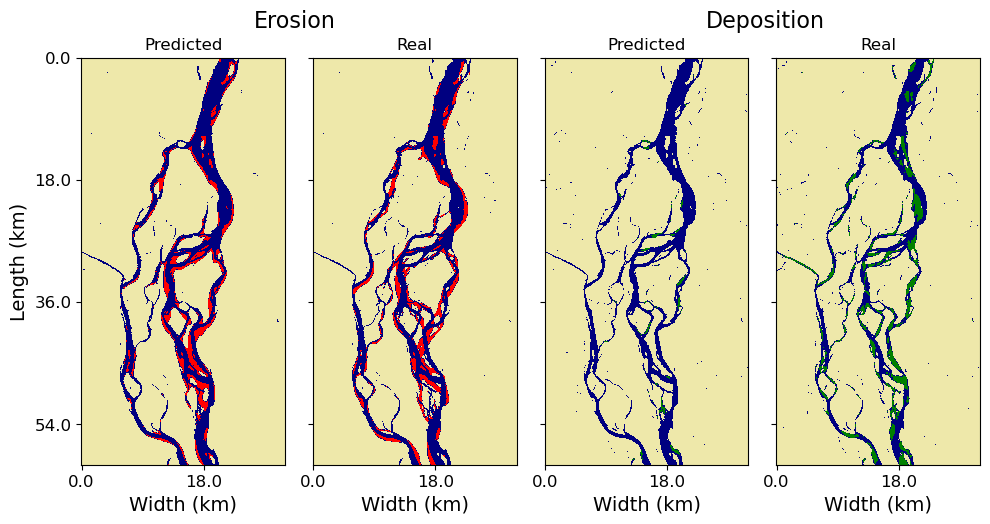

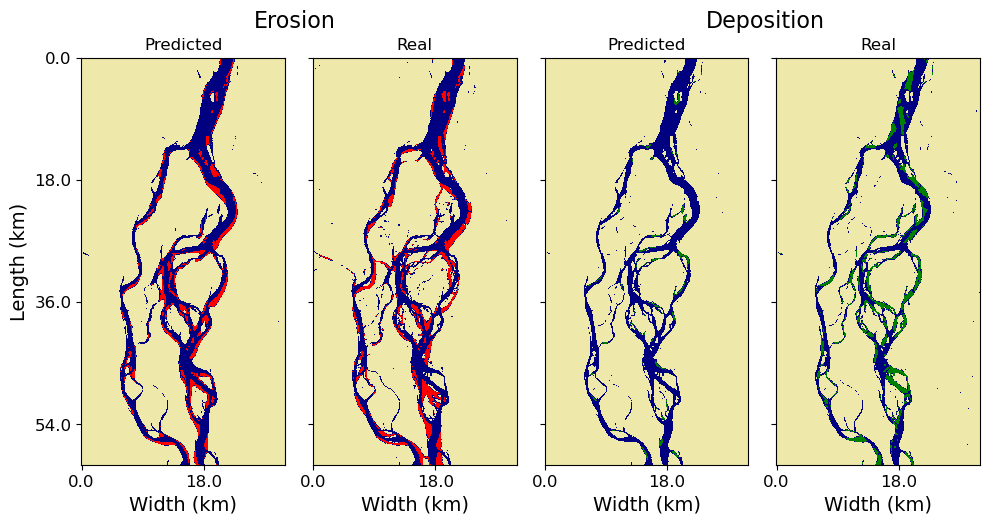

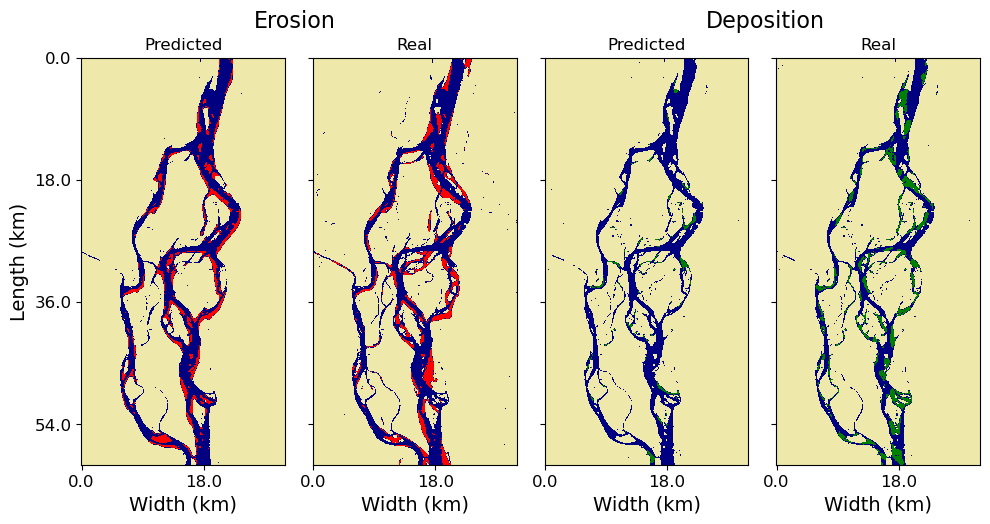

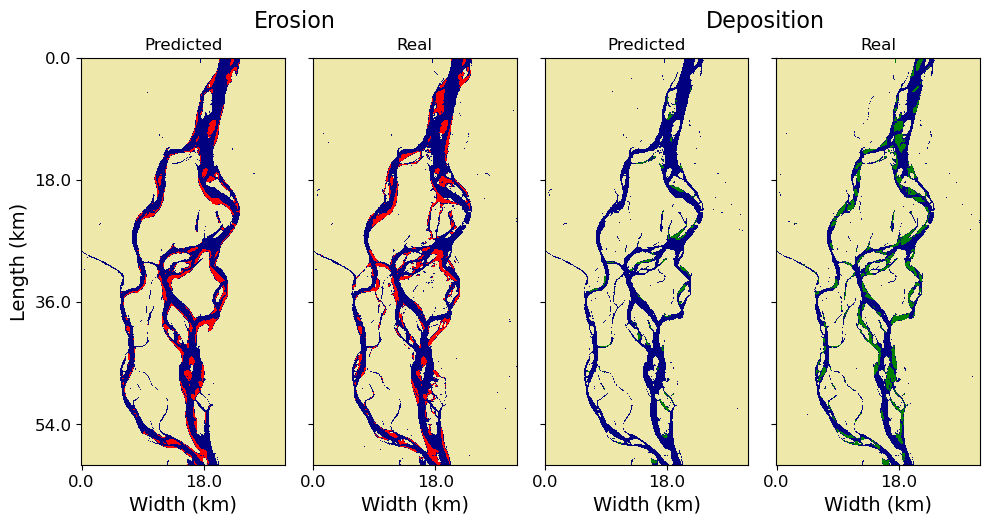

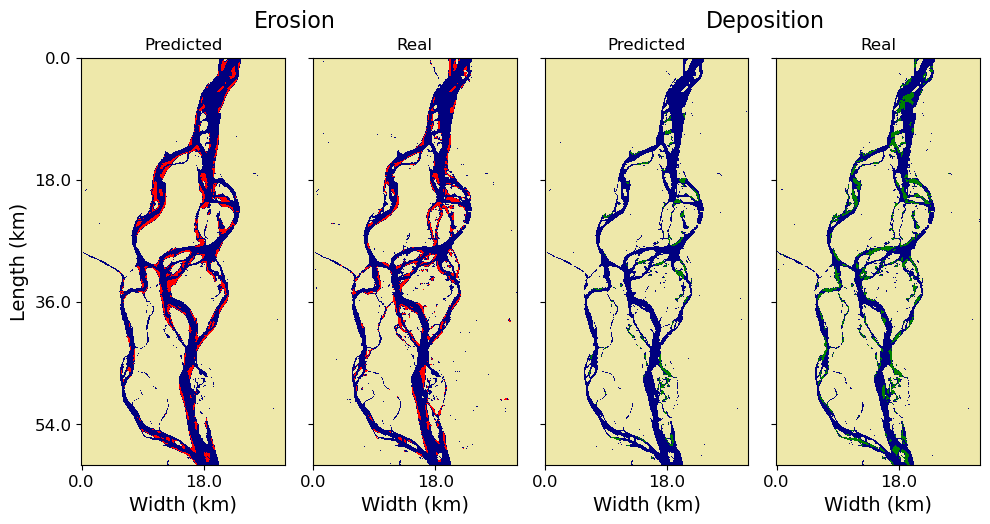

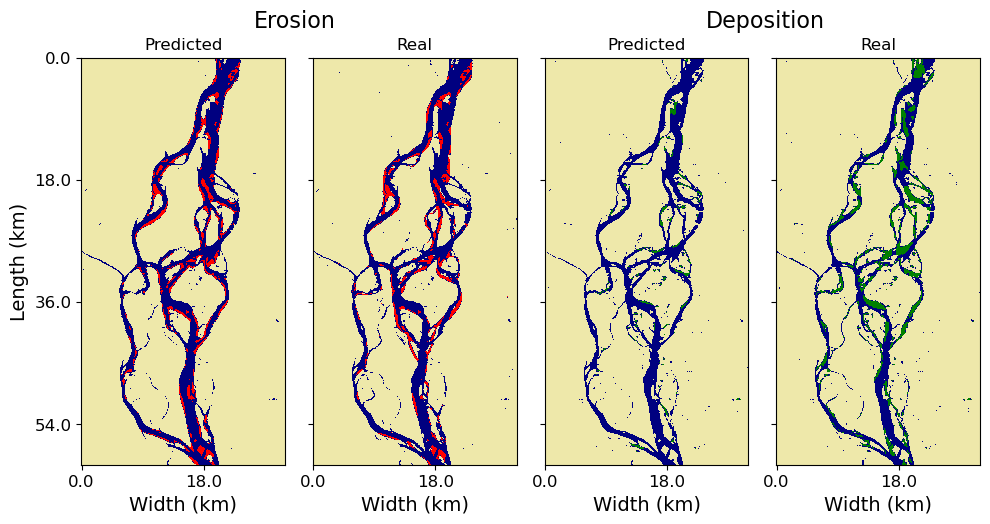

In [24]:
%matplotlib inline
for i in range(len(test_set)):
    erosion_sites(model_loss, test_set, i, water_threshold=new_thr, device=device, save_img=False)

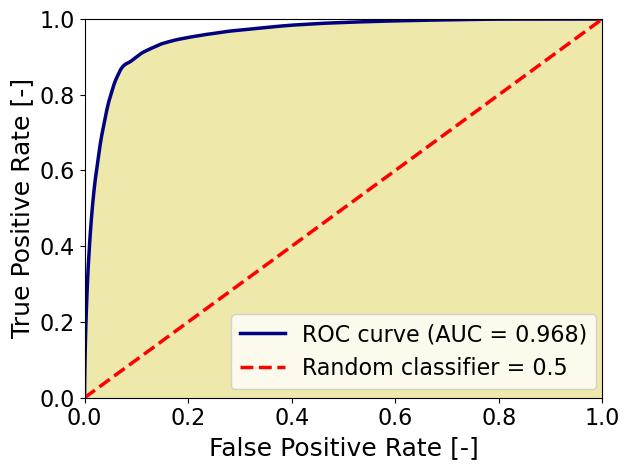

In [26]:
%matplotlib inline
get_total_roc_curve(model_loss, test_set, device=device, save_img=False)

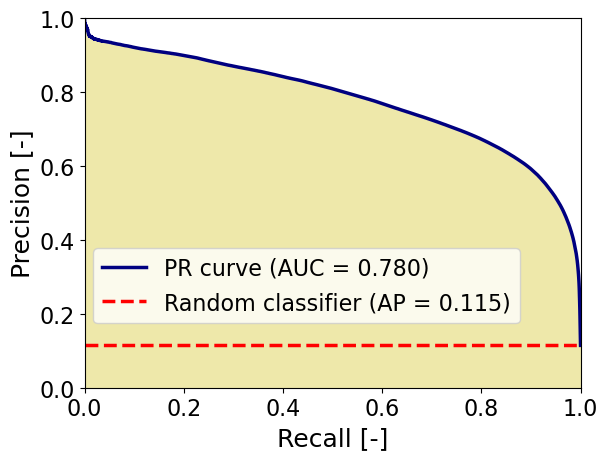

In [27]:
%matplotlib inline
get_total_pr_curve(model_loss, test_set, device=device, save_img=False);

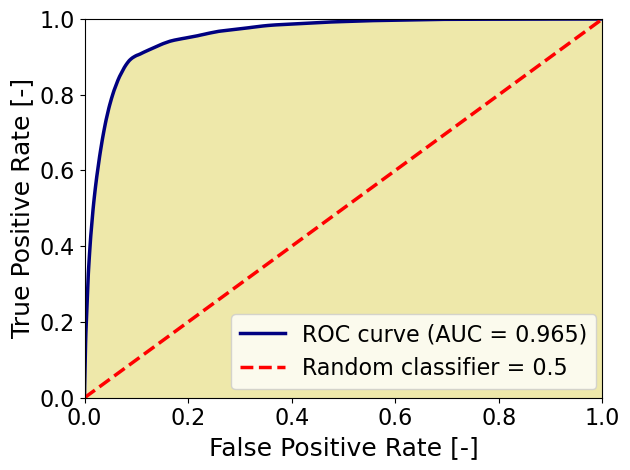

In [28]:
%matplotlib inline
get_total_roc_curve(model_recall, test_set, model_type='max recall', device=device, save_img=True)

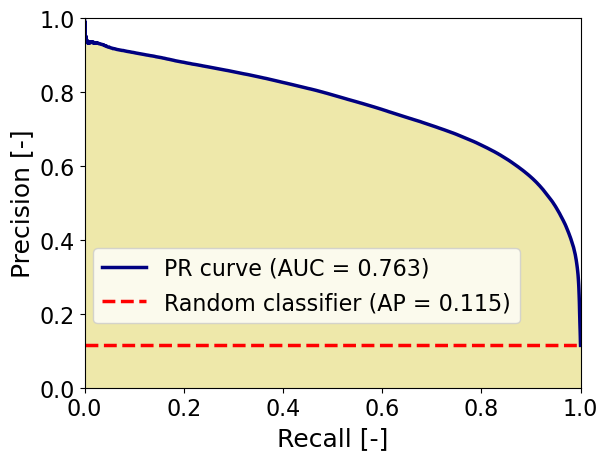

In [29]:
%matplotlib inline
get_total_pr_curve(model_recall, test_set, model_type='max recall', device=device, save_img=True);

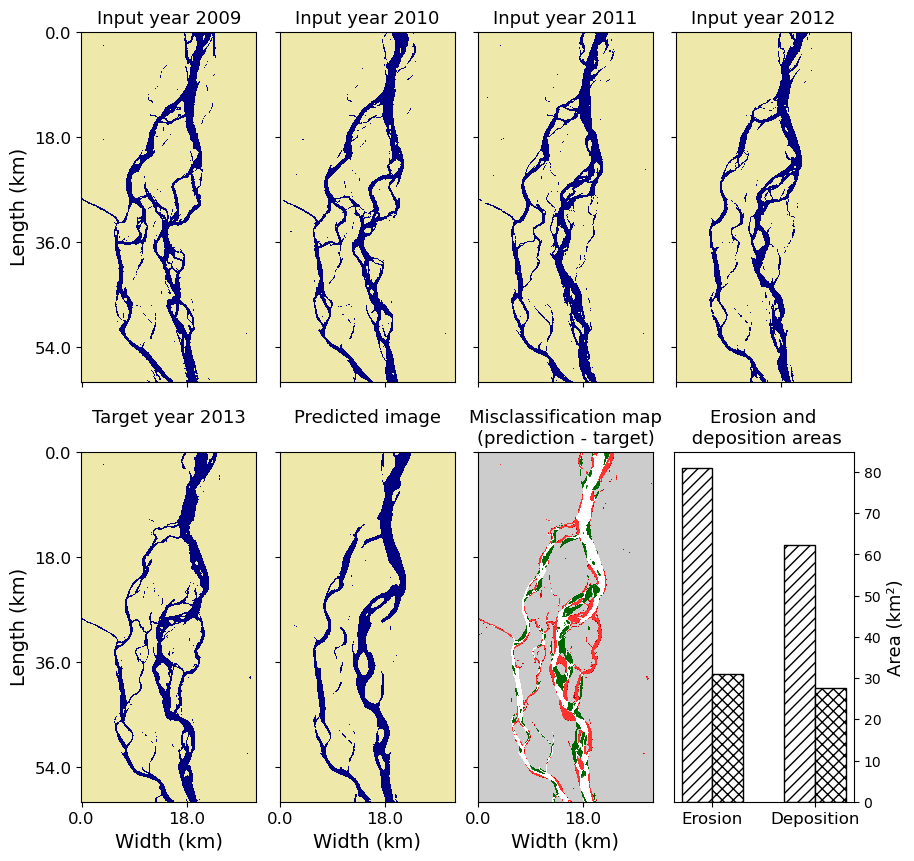

In [32]:
# direct comparison of same sample predictions with original threshold (0.5) and optimal threshold (0.402) 

%matplotlib inline
show_evolution_nolegend(11, test_set, model_loss, device=device, save_img=False)

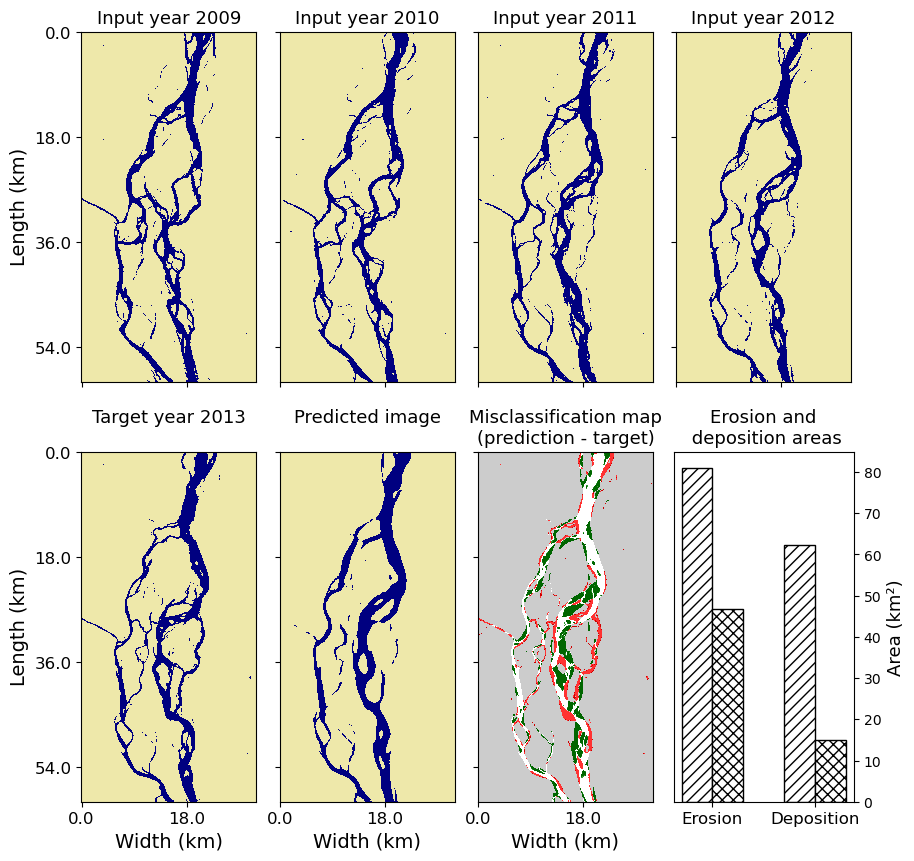

In [33]:
%matplotlib inline
show_evolution_nolegend(11, test_set, model_loss, water_threshold=new_thr, device=device, save_img=False)

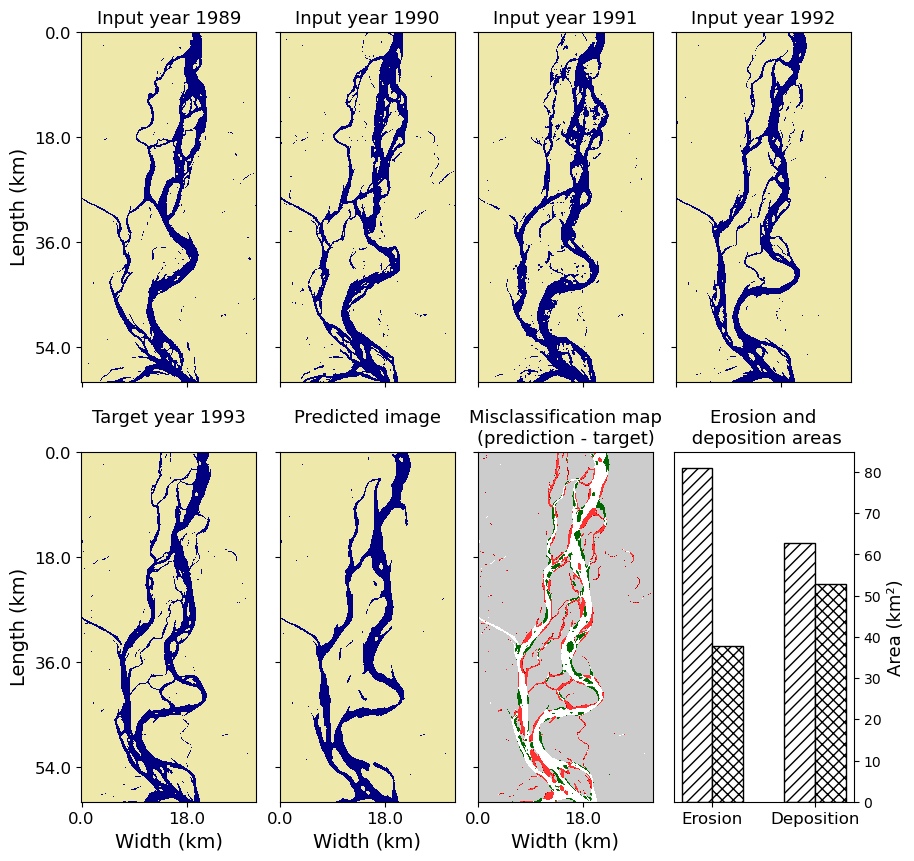

In [14]:
# max recall model predictions

%matplotlib inline
show_evolution_nolegend(1, test_set, model_recall, loss_recall='max recall', device=device, save_img=True)

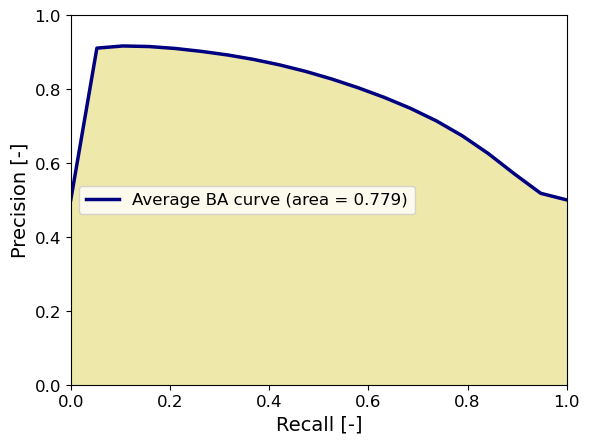

In [23]:
get_total_balanced_accuracy(model_loss, test_set, device=device, save_img=False)

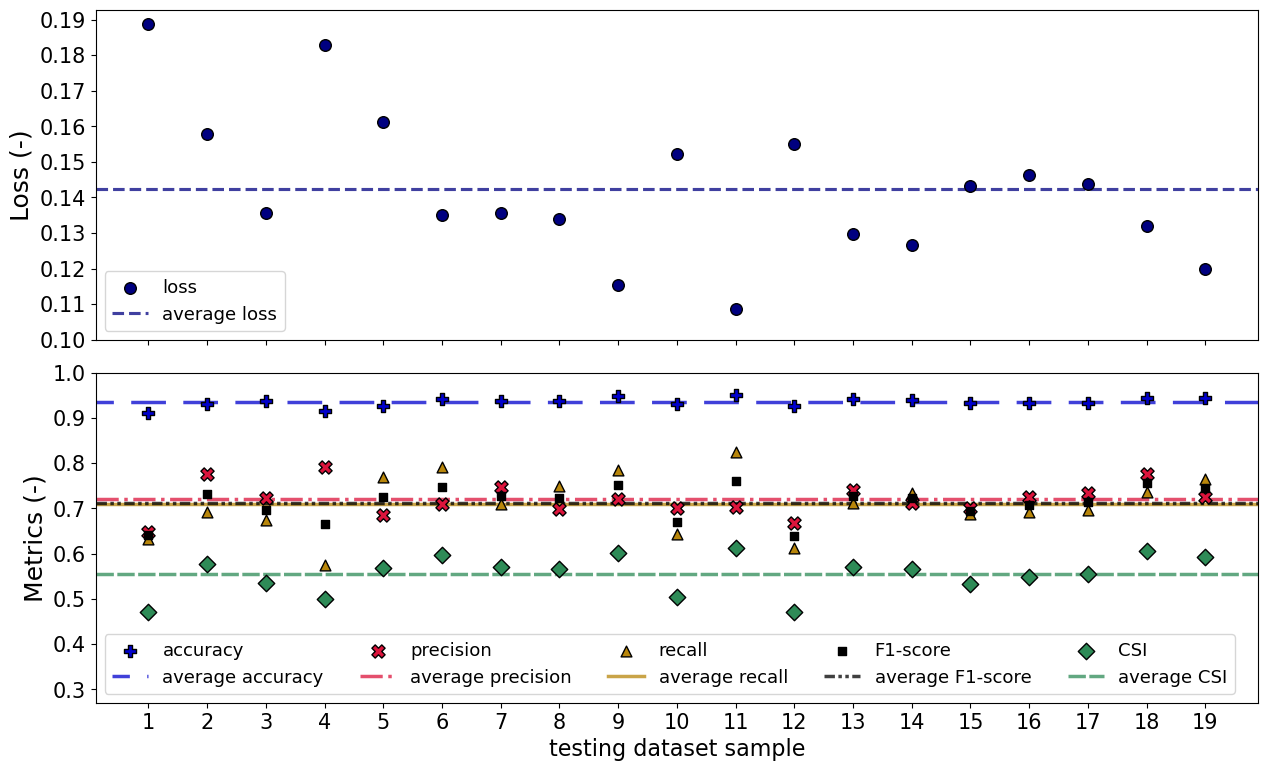

In [30]:
# min loss model

%matplotlib inline
plot_dataset_losses_metrics(model_loss, test_set, device=device, save_img=False) 

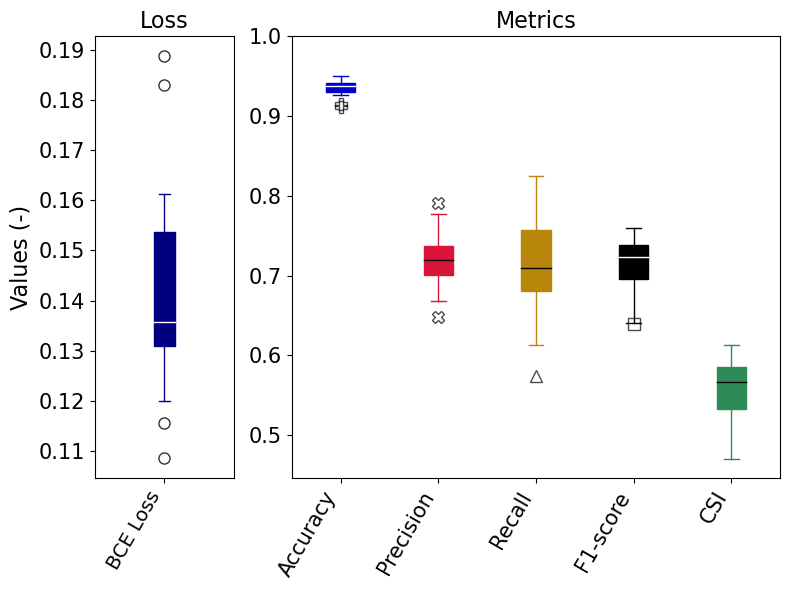

In [31]:
%matplotlib inline
box_plots(model_loss, test_set, device=device, save_img=False)

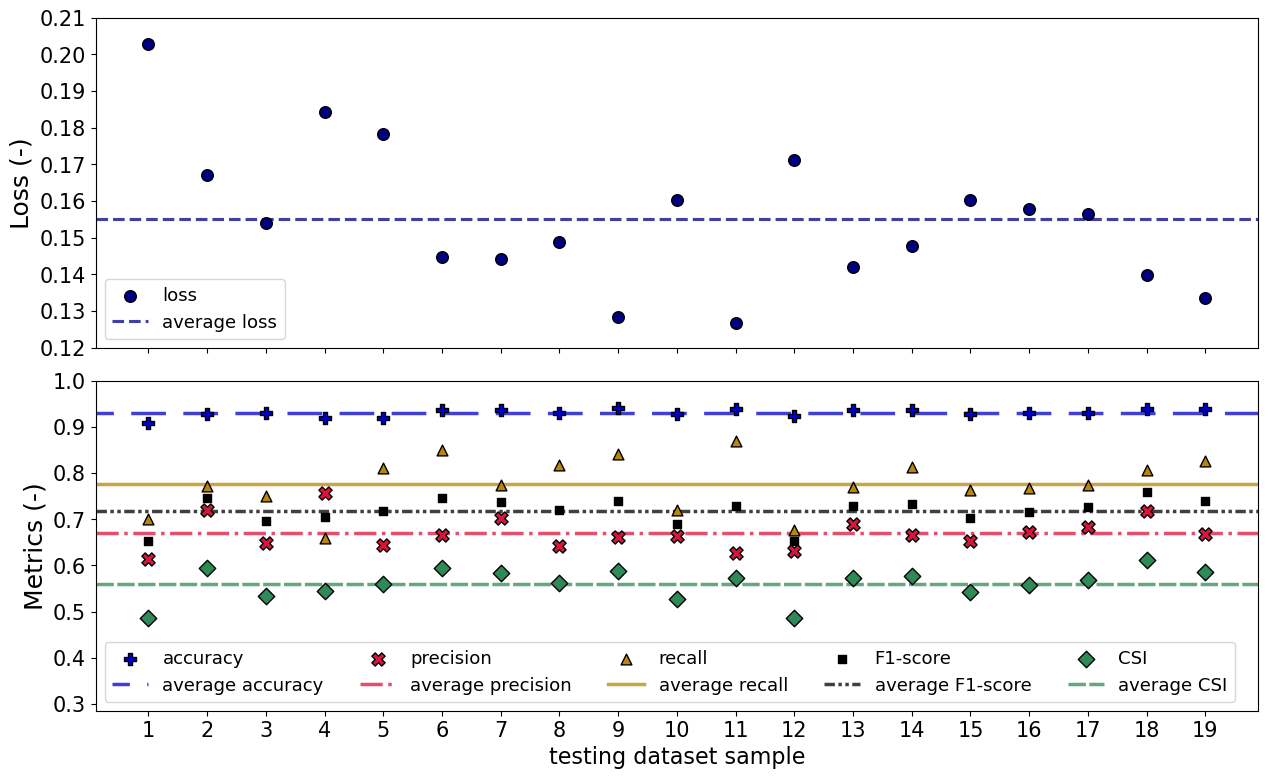

In [38]:
# max recall model
%matplotlib inline
plot_dataset_losses_metrics(model_recall, test_set, model_type='max recall', device=device, save_img=True) 

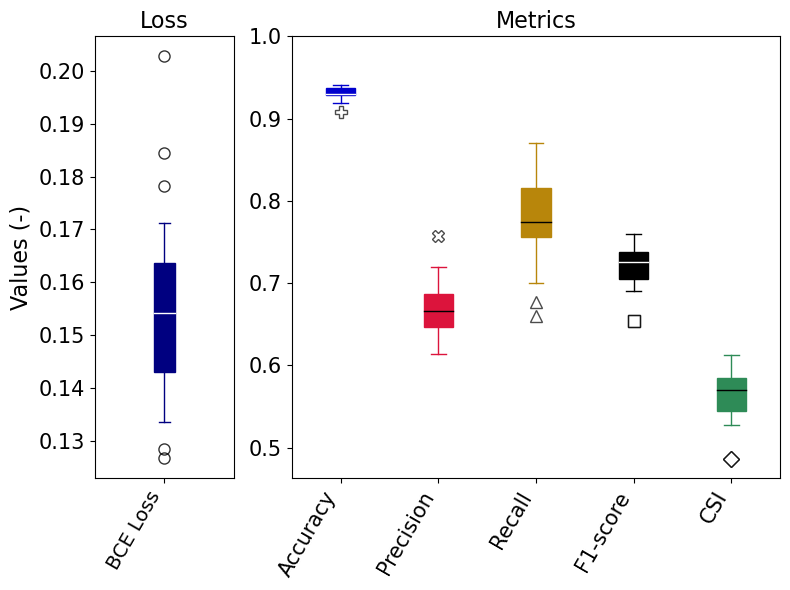

In [32]:
%matplotlib inline
box_plots(model_recall, test_set, model_type='max recall', device=device, save_img=True)

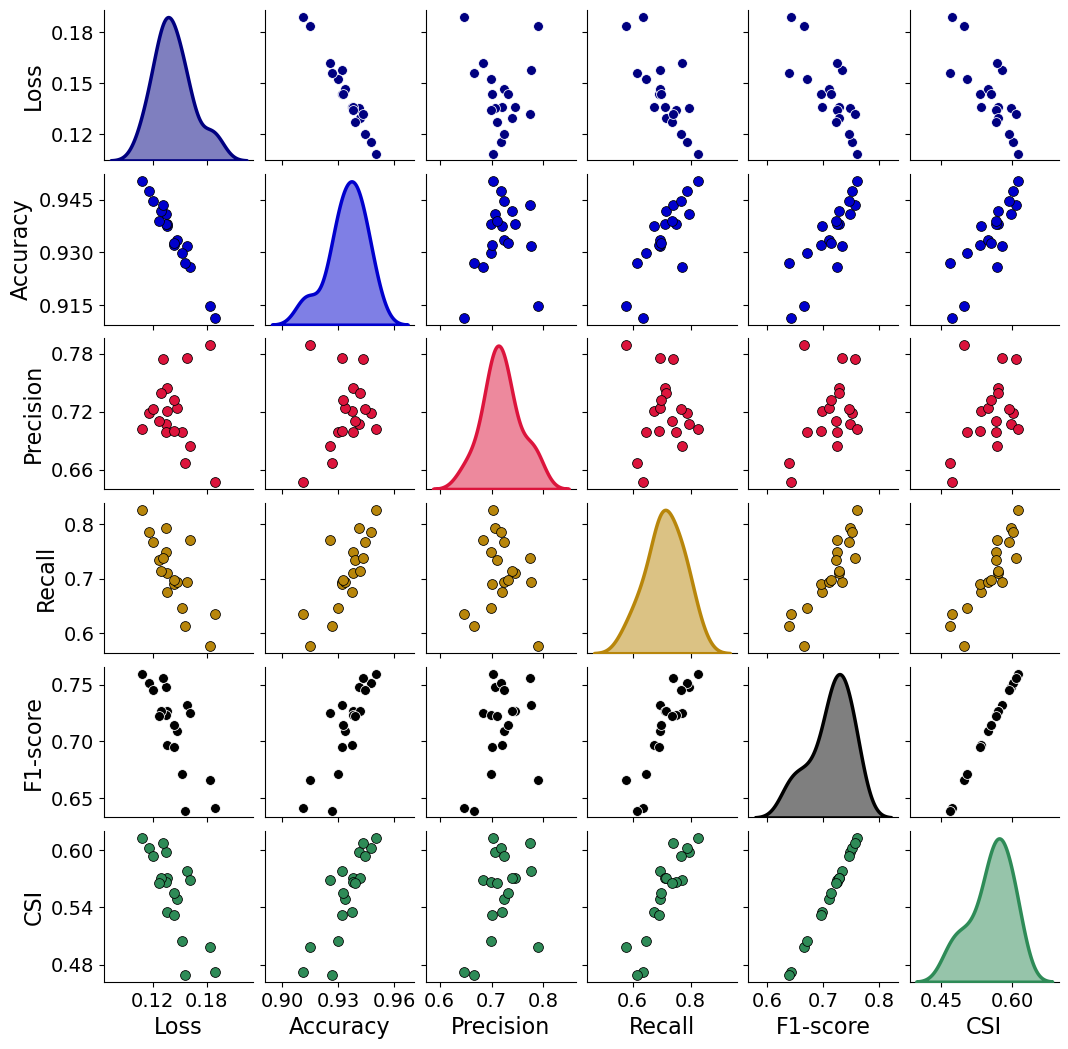

In [38]:
%matplotlib inline
correlation_metrics(model_loss, test_set, device=device, save_img=False)

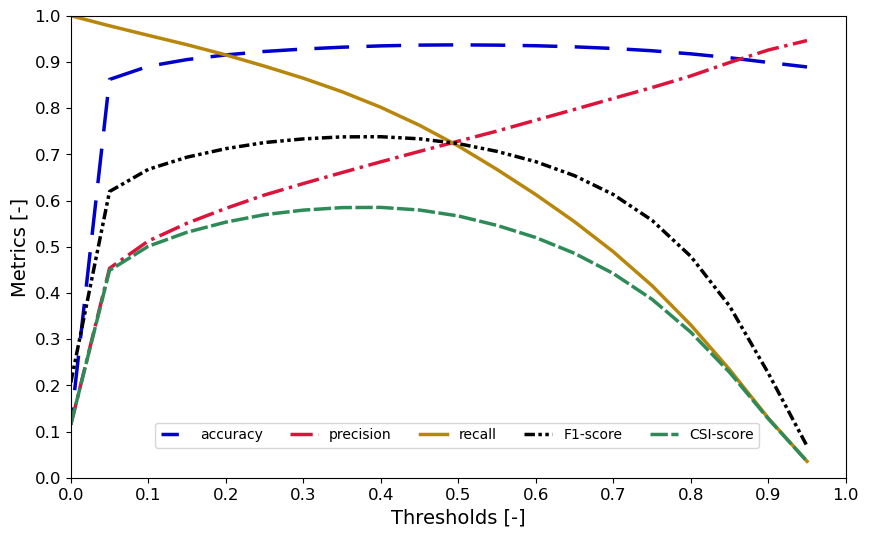

In [35]:
%matplotlib inline
metrics_thresholds(model_loss, test_loader, device=device, save_img=True)

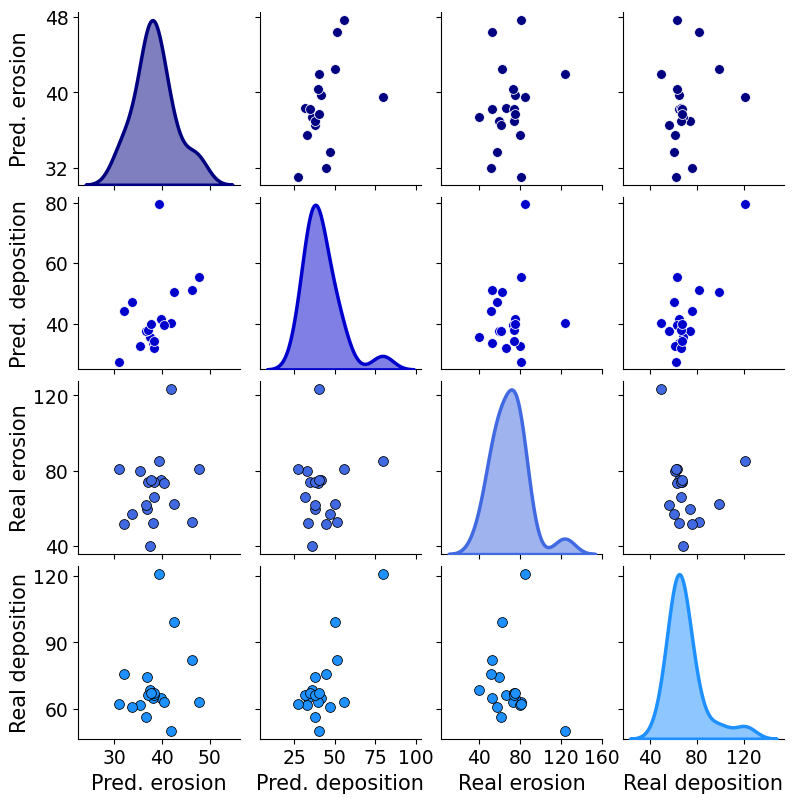

In [321]:
%matplotlib inline
correlation_erdep(model_loss, test_set, device=device, save_img=True)

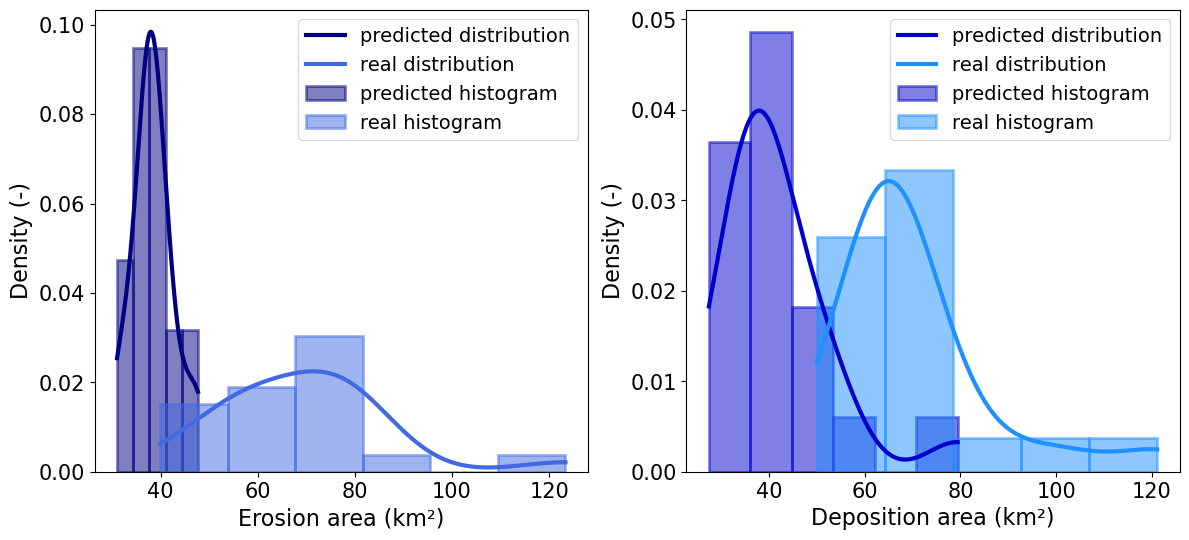

In [373]:
%matplotlib inline
erosion_deposition_distribution(model_loss, test_set, device=device, save_img=True)

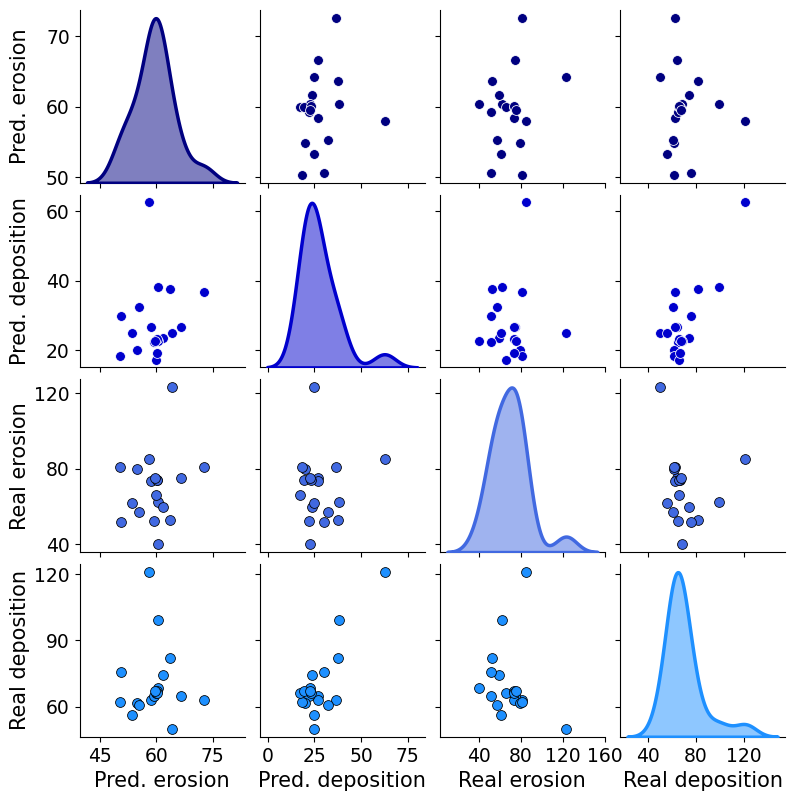

In [34]:
%matplotlib inline
correlation_erdep(model_recall, test_set, model_type='max_recall', device=device, save_img=False)

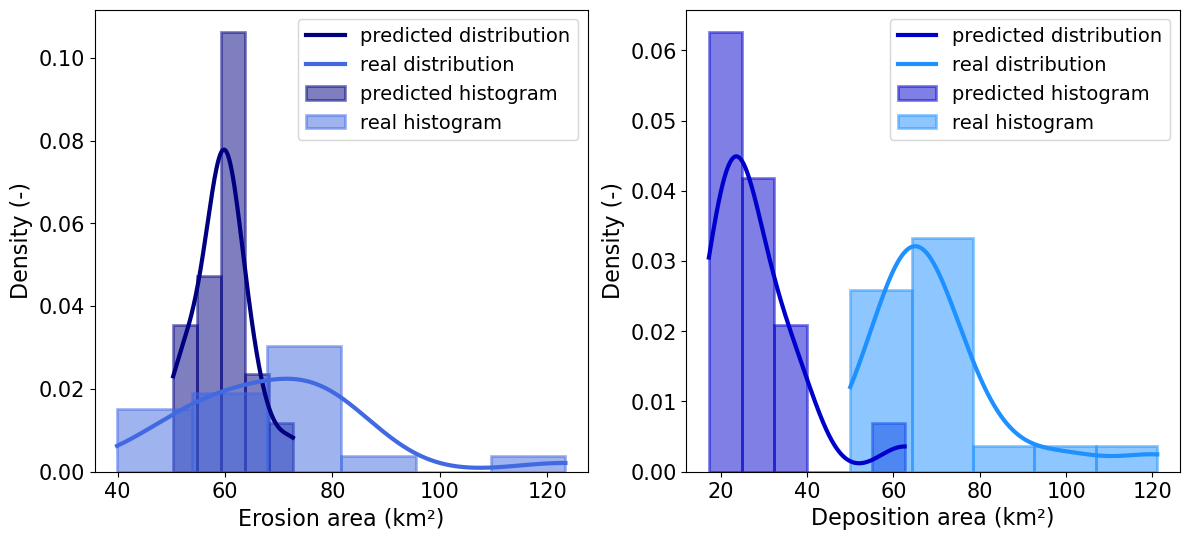

In [35]:
%matplotlib inline
erosion_deposition_distribution(model_recall, test_set, model_type='max_recall', device=device, save_img=True)